# <center> *Project - Bag Cost Prediction*

## Overall Approach
1. Retrieve information about the data for observation using (info, describe).
2. Outlier Detection - Checking Skewness value in columns, Plotting various graphs (Box plot, Scatter Plot, Histogram).
3. Replacing Outliers using Quantile based Flooring and Capping (2-98 quantile range).
3. Replacing NAN values with Mean.
4. Buildings Models - OLS, GD, MBGD, SGD. Also finding R sqrt, MSE, RMSE for all.
5. Overall Conclusion.

# <center><span style='color:Purple'> Exploratatory Data Analysis </span></center>
### Importing Libraries

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import statsmodels.api   as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.metrics         import mean_squared_error, r2_score
from sklearn                 import metrics, linear_model
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import SGDRegressor

### Read the data using pandas from .csv file

In [2]:
Bag_data = pd.read_csv ('/Users/noopur/Downloads/AIML_C5_May2021_Data_miniproject.csv')

### Check the first few rows of the dataset
<span style='background : yellow' > **Observation:**   </span> Dataset contains some non-numeric values (e.g. for Feature - Weight, Width) which needs to be converted to NAN.

In [3]:
Bag_data.head(10)

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134
5,450.0,26.8,29.7,34.7,13.6024,U
6,500.0,26.8,29.7,34.5,14.1795,5.2785
7,390.0,27.6,30.0,35,12.6700,4.69
8,450.0,27.6,30.0,35.1,14.0049,4.8438
9,500.0,#,30.7,36.2,14.2266,4.9594


### Retrieving information about the data
<span style='background : yellow'> **Observation** </span>
* Weight, Length, Width have object data type and it needs to be converted to float data type.
* There are missing values for feature - Height, Width.

In [4]:
Bag_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


### Coverting data type of feature from object to float, also replacing any non numeric value to NAN

In [5]:
Bag_data['Weight'] = pd.to_numeric(Bag_data['Weight'], errors = 'coerce')      
Bag_data['Length'] = pd.to_numeric(Bag_data['Length'], errors = 'coerce') 
Bag_data['Width']  = pd.to_numeric(Bag_data['Width'],  errors = 'coerce')

### Checking Null values after datatype conversion
<span style='background : yellow' > **Observation:** </span> Since there were non numeric values in the original dataset, after conversion to NAN the number of missing values have increased.

In [6]:
Bag_data.isnull().sum()

Cost       0
Weight     2
Weight1    0
Length     1
Height     1
Width      2
dtype: int64

### Checking statistical summary of the data
<span style='background : yellow' > **Observation** </span> 
* Cost's minimum value is Zero which is an invalid value.
* Notably a large difference between 90 %tile and max values for Cost, Width.
* More difference between (90 %tile & max value) for column Weight, Weight1, Length than compared to the difference between their respective other quantiles ranges.

In [7]:
Bag_data.describe(percentiles = [.10, .20, .30, .40, .60, .70, .80, .90])

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,157.000000,159.000000,158.000000,158.000000,157.000000
mean,398.326415,26.259873,28.415723,31.239241,8.933124,3826.050502
std,357.978317,10.052942,10.716328,11.646141,4.273069,47884.860134
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
10%,29.580000,13.380000,14.620000,16.140000,3.735200,2.295720
20%,106.000000,18.240000,20.000000,22.200000,5.661000,3.293100
30%,142.000000,20.000000,22.000000,23.730000,6.297060,3.553560
40%,181.600000,22.040000,24.000000,26.440000,6.951060,3.829080
50%,273.000000,25.200000,27.300000,29.700000,7.733000,4.248500
60%,390.000000,28.620000,31.000000,35.020000,9.600000,4.741400


# <center><span style='color:Purple'> Outlier Detection Analysis through various methods </span>

### (a) Identifying Outliers with Skewness
<span style='background : yellow' > **Observation:** </span> Skewness range should be between -1 & 1. We can observe that Width's skewness value indicates presence of extreme value. Cost also contains some outliers. 

In [8]:
Bag_data.skew()

Cost        1.104450
Weight      0.582706
Weight1     0.539863
Length      0.387281
Height      0.412664
Width      12.529964
dtype: float64

### (b) Identifying Outliers through various graph plots
<span style='background : yellow' > **Observation:** </span> There are outliers present in - Cost, Weight, Weight1, Length, Width. No outliers in Height
###  *Scatter Plot*

Text(0, 0.5, 'Bag_Cost')

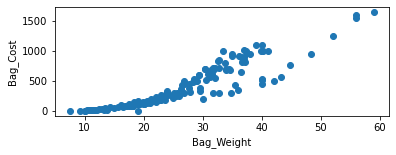

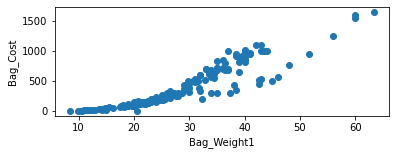

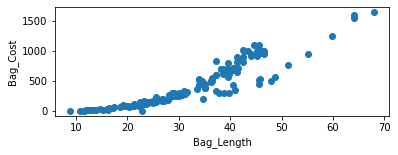

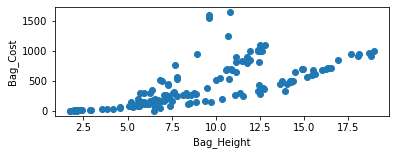

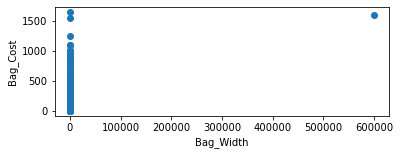

In [9]:
# Scatter plot
fig, ax = plt.subplots(figsize=(6,2))
ax.scatter(Bag_data['Weight'], Bag_data['Cost'])
ax.set_xlabel('Bag_Weight', fontsize= 10)
ax.set_ylabel('Bag_Cost', fontsize= 10)

fig, ax = plt.subplots(figsize=(6,2))
ax.scatter(Bag_data['Weight1'], Bag_data['Cost'])
ax.set_xlabel('Bag_Weight1', fontsize= 10)
ax.set_ylabel('Bag_Cost', fontsize= 10)

fig, ax = plt.subplots(figsize=(6,2))
ax.scatter(Bag_data['Length'], Bag_data['Cost'])
ax.set_xlabel('Bag_Length', fontsize= 10)
ax.set_ylabel('Bag_Cost', fontsize= 10)

fig, ax = plt.subplots(figsize=(6,2))
ax.scatter(Bag_data['Height'], Bag_data['Cost'])
ax.set_xlabel('Bag_Height', fontsize= 10)
ax.set_ylabel('Bag_Cost', fontsize= 10)

fig, ax = plt.subplots(figsize=(6,2))
ax.scatter(Bag_data['Width'], Bag_data['Cost'])
ax.set_xlabel('Bag_Width', fontsize= 10)
ax.set_ylabel('Bag_Cost', fontsize= 10)

### *Box Plot*

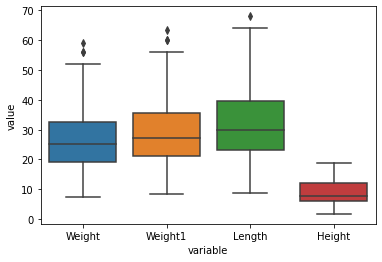

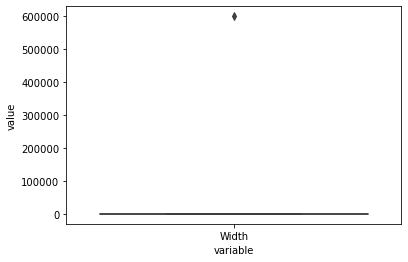

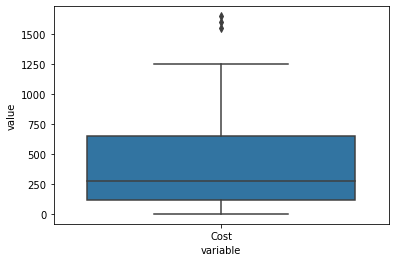

In [10]:
Bag_boxplot = pd.DataFrame(data = Bag_data, columns = ["Weight","Weight1","Length","Height"])
sns.boxplot(x = "variable", y = "value", data = pd.melt(Bag_boxplot))
plt.show()

Bag_boxplot = pd.DataFrame(data = Bag_data, columns = ["Width"])
sns.boxplot(x = "variable", y = "value", data = pd.melt(Bag_boxplot))
plt.show()

Bag_boxplot = pd.DataFrame(data = Bag_data, columns = ["Cost"])
sns.boxplot(x = "variable", y = "value", data = pd.melt(Bag_boxplot))
plt.show()

### *Histogram*
An outlier will appear outside the overall pattern of distribution

<AxesSubplot:title={'center':'Weight Vs Cost'}, xlabel='Weight', ylabel='Cost'>

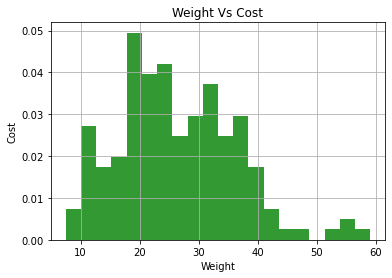

In [11]:
plt.title('Weight Vs Cost')
plt.xlabel('Weight')
plt.ylabel('Cost')
Bag_data['Weight'].hist(bins = 20, density = 1, facecolor = 'Green', alpha = 0.8)

<AxesSubplot:title={'center':'Weight1 Vs Cost'}, xlabel='Weight1', ylabel='Cost'>

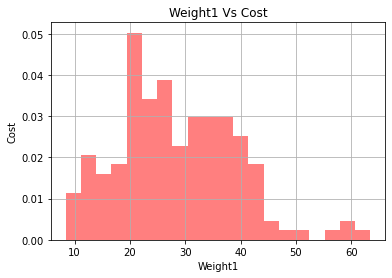

In [12]:
plt.title('Weight1 Vs Cost')
plt.xlabel('Weight1')
plt.ylabel('Cost')
Bag_data['Weight1'].hist(bins = 20, density = 1, facecolor = 'Red', alpha = 0.5)

<AxesSubplot:title={'center':'Length Vs Cost'}, xlabel='Length', ylabel='Cost'>

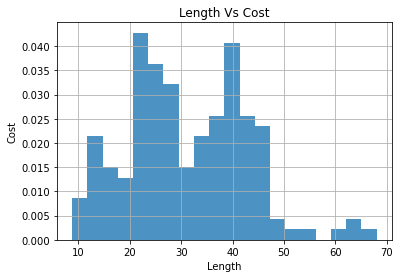

In [13]:
plt.title('Length Vs Cost')
plt.xlabel('Length')
plt.ylabel('Cost')
Bag_data['Length'].hist(bins = 20, density = 1, alpha = 0.8)

<AxesSubplot:title={'center':'Height Vs Cost'}, xlabel='Height', ylabel='Cost'>

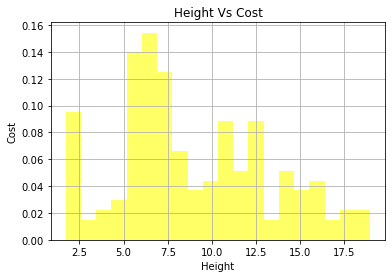

In [14]:
plt.title('Height Vs Cost')
plt.xlabel('Height')
plt.ylabel('Cost')
Bag_data['Height'].hist(bins = 20, density = 1, facecolor = 'yellow', alpha = 0.6)

<AxesSubplot:title={'center':'Width Vs Cost'}, xlabel='Width', ylabel='Cost'>

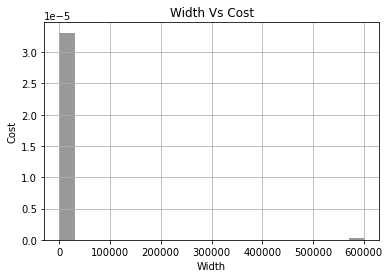

In [15]:
plt.title('Width Vs Cost')
plt.xlabel('Width')
plt.ylabel('Cost')
Bag_data['Width'].hist(bins = 20, density = 1, facecolor = 'Gray', alpha = 0.8)

# <center> <span style='color:Purple'> Outlier Treatment - Quantile based Flooring and Capping </span></center> 

<span style='background : yellow' > **Observation:** </span>
* Tried using 1,99 quantile range - it didn't remove outlier completely.
* Not much change when using 2,98 and 5,95 quantil range - so going forward with 2,98 quantile range.
* When tried **IQR** for treating outlier in columns - after overall outlier treatment and replacing NAN with mean it still resulted in some outlier. So going ahead with Quantile based Flooring and Capping approach.

In [16]:
percentiles = Bag_data.quantile([0.02, 0.98]).values

Bag_data.loc[Bag_data['Cost'] < percentiles[0,0], 'Cost'] = percentiles[0,0]
Bag_data.loc[Bag_data['Cost'] > percentiles[1,0], 'Cost'] = percentiles[1,0]

Bag_data.loc[Bag_data['Weight'] < percentiles[0,1], 'Weight'] = percentiles[0,1]
Bag_data.loc[Bag_data['Weight'] > percentiles[1,1], 'Weight'] = percentiles[1,1]

Bag_data.loc[Bag_data['Weight1'] < percentiles[0,2], 'Weight1'] = percentiles[0,2]
Bag_data.loc[Bag_data['Weight1'] > percentiles[1,2], 'Weight1'] = percentiles[1,2]

Bag_data.loc[Bag_data['Length'] < percentiles[0,3], 'Length'] = percentiles[0,3]
Bag_data.loc[Bag_data['Length'] > percentiles[1,3], 'Length'] = percentiles[1,3]

Bag_data.loc[Bag_data['Width'] < percentiles[0,5], 'Width'] = percentiles[0,5]
Bag_data.loc[Bag_data['Width'] > percentiles[1,5], 'Width'] = percentiles[1,5]

In [17]:
Bag_data.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,159.000000,157.000000,159.000000,158.000000,158.000000,157.000000
mean,391.173711,26.176229,28.322667,31.140177,8.933124,4.438648
std,336.683542,9.705766,10.352018,11.264420,4.273069,1.679977
min,7.080000,10.136000,10.664000,11.656000,1.728400,1.160708
25%,120.000000,19.000000,21.000000,23.125000,5.940600,3.395700
50%,273.000000,25.200000,27.300000,29.700000,7.733000,4.248500
75%,650.000000,32.700000,35.500000,39.675000,12.248700,5.589000
max,1226.000000,51.556000,55.312000,59.056000,18.957000,7.583512


# <center><span style='color:Purple'> Handling NAN - Replacing Mean </span>

In [18]:
Bag_data['Weight'] = Bag_data['Weight'].fillna(Bag_data['Weight'].mean())    
Bag_data['Length'] = Bag_data['Length'].fillna(Bag_data['Length'].mean())
Bag_data['Height'] = Bag_data['Height'].fillna(Bag_data['Height'].mean())
Bag_data['Width']  = Bag_data['Width'].fillna(Bag_data['Width'].mean())

### Checking for any Ouliers after Outlier treatment and replacing NAN with mean

<AxesSubplot:xlabel='variable', ylabel='value'>

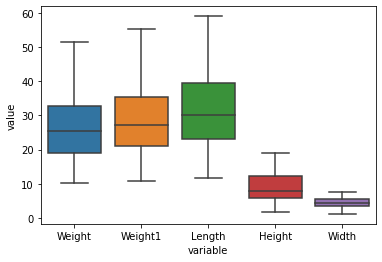

In [19]:
Bag_boxplot = pd.DataFrame(data = Bag_data, columns = ["Weight", "Weight1", "Length", "Height", "Width"])
sns.boxplot(x = "variable", y = "value", data = pd.melt(Bag_boxplot))

<AxesSubplot:xlabel='variable', ylabel='value'>

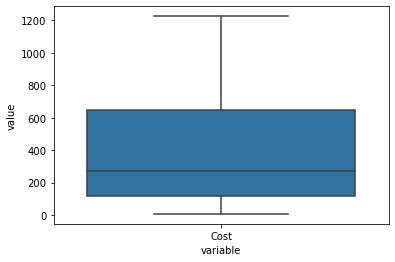

In [20]:
Bag_boxplot = pd.DataFrame(data = Bag_data, columns = ["Cost"])
sns.boxplot(x = "variable", y = "value", data = pd.melt(Bag_boxplot))

### Checking Overall Skewness
<span style='background : yellow' > **Observation:** </span>All columns are now skewed in proper range (i.e) -1 to 1

In [21]:
Bag_data.skew()

Cost       0.792620
Weight     0.415071
Weight1    0.363348
Length     0.220658
Height     0.413943
Width      0.010552
dtype: float64

# <center><span style='color:Purple'> Checking Correlations </span></center>
<span style='background : yellow' > **Observation from HeatMap & PairGrid:** </span> 
* Since Weight, Weight1, Length are highly correlated we can drop Weight1 and Length.
* Cost has lowest correlation with Height among all.
### (a) Heatmap - to understand Correlation

<AxesSubplot:>

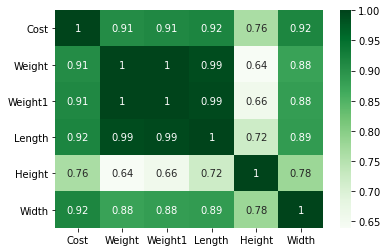

In [22]:
sns.heatmap(Bag_data.corr(),cmap='Greens',annot=True)

### (b) Plot Visualization - PairGrid

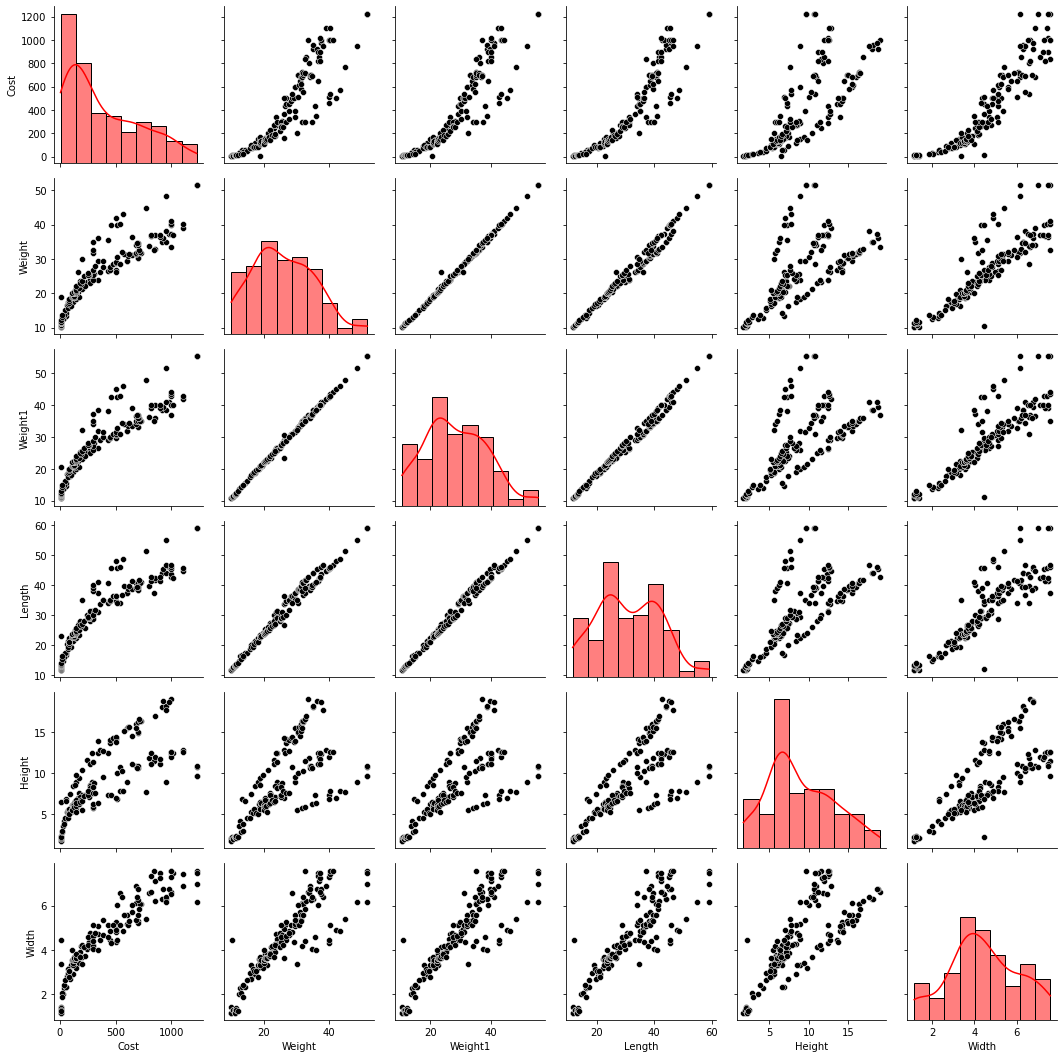

In [23]:
A = sns.PairGrid(Bag_data)
A.map_diag(sns.histplot, kde = True, color = 'Red')
A.map_offdiag(sns.scatterplot, color = 'Black')

# <center><span style='color:Purple'> Bulding Models - OLS, GD, MBGD, SGD </span>

### Splitting of Dataset into Train and Test data

In [24]:
# Independent Variable / feature
X = Bag_data[['Weight','Height','Width']]
X = sm.add_constant(X)

# Dependent Variable / Target Variable
Y = Bag_data[['Cost']]

# Data into train and Test
X_train, X_test, y_train, y_test = train_test_split( X,Y,train_size = 0.8,random_state = 42 )

## <span style='color:Orange'> OLS Model </span>

In [25]:
Ols_Model = sm.OLS( y_train, X_train).fit()
print('Model Equation: Y = ', Ols_Model.params.const , 
                       '+ (', Ols_Model.params.Weight, 'X1)', 
                       '+ (', Ols_Model.params.Height, 'X2)',
                       '+ (', Ols_Model.params.Width, 'X3)')
Ols_Model.summary2()

Model Equation: Y =  -503.85639916498883 + ( 16.405337994927052 X1) + ( 11.574970017536486 X2) + ( 78.75187331683105 X3)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.903    
Dependent Variable: Cost             AIC:                1536.8831
Date:               2021-06-01 20:27 BIC:                1548.2599
No. Observations:   127              Log-Likelihood:     -764.44  
Df Model:           3                F-statistic:        392.2    
Df Residuals:       123              Prob (F-statistic): 9.09e-63 
R-squared:          0.905            Scale:              10225.   
-------------------------------------------------------------------
          Coef.    Std.Err.     t      P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const   -503.8564   27.2328  -18.5018  0.0000  -557.7620  -449.9508
Weight    16.4053    1.8966    8.6500  0.0000    12.6512    20.1595
Height    11.5750    3.5280    3.2809  0.0013     4.5914    18.5585
Width     78.7519   13.4844    5.8402  0.0000    52.0602   105.4435
------------------------------------------------------------------
Omnibus:               12.191       Durbin-Watson:          2.104 
Prob(Omnibus):         0.002        Jarque-Bera (JB):       13.366
Skew:                  0.793        Prob(JB):               0.001 
Kurtosis:              3.087        Condition No.:          90    
==================================================================

"""

### OLS Model prediction

In [26]:
model_predict = Ols_Model.predict(X_test)

model_r2_score = r2_score(y_test, model_predict)
print("R2: ",model_r2_score)

model_mse = metrics.mean_squared_error(y_test, model_predict)
print('MSE: ', model_mse)

model_rmse = (np.sqrt(mean_squared_error(y_test, model_predict)))
print("RMSE: ",model_rmse)

R2:  0.8756221962868617
MSE:  17541.663031533717
RMSE:  132.44494339737443


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y')

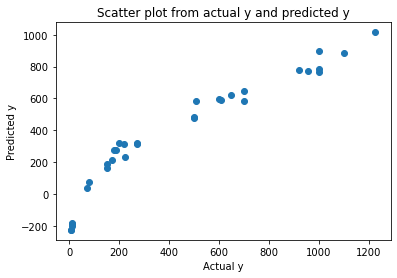

In [27]:
plt.figure(figsize=(6,4))
plt.scatter(y_test, model_predict)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')

## <span style='color:Orange'> Gradient Descent </span>

In [28]:
Iterations = 5000
ETA = 0.001

def Gradient_decent(X1, X2, X3, y, w0=0, w1=0, w2=0, w3=0, epochs = Iterations, learning_rate = ETA):
     N = float(len(y))
     cost_history = np.zeros(epochs)
     for i in range(epochs):
          cost = 0.0
          y_current = w0 + (w1 * X1) + (w2 * X2) + (w3 * X3)
          cost = sum([data**2 for data in (y-y_current)]) / N
          w0_d = -(2/N) * sum(y - y_current)
          w1_d = -(2/N) * sum(X1 * (y - y_current))
          w2_d = -(2/N) * sum(X2 * (y - y_current))
          w3_d = -(2/N) * sum(X3 * (y - y_current))

          w0 = w0 - (learning_rate * w0_d)                          
          w1 = w1 - (learning_rate * w1_d)
          w2 = w2 - (learning_rate * w2_d)
          w3 = w3 - (learning_rate * w3_d)
          cost_history[i] = cost
          print("w0 = {0}, w1 = {1}, w2 = {2}, w3 = {3}, iteration = {4}, cost = {5}".format(w0, w1, w2, w3, i, cost))
     print("MSE:", cost) 
     print("RMSE:", np.sqrt(cost)) 
     return w0, w1, w2, w3, cost_history
         

In [29]:
X1  = X_train['Weight']
X2 = X_train['Height']
X3 = X_train['Width']
y  = y_train['Cost']

GD_model = Gradient_decent(X1, X2, X3, y)

w0 = 0.7560497637795277, w1 = 25.375474705467678, w2 = 8.523444688919366, w3 = 4.333208934217844, iteration = 0, cost = 247532.63301417325
w0 = -0.005062232197056371, w1 = 5.97000504478704, w2 = 2.2434388990349756, w3 = 1.1193240725935798, iteration = 1, cost = 159802.64444087647
w0 = 0.38934394701183, w1 = 20.673214404830247, w2 = 7.234431493269025, w3 = 3.653131186466558, iteration = 2, cost = 108897.95658741353
w0 = -0.0963688713859176, w1 = 9.399042173382885, w2 = 3.63697422210282, w3 = 1.8087073786486738, iteration = 3, cost = 79356.09273505847
w0 = 0.08823709753013356, w1 = 17.911822666039797, w2 = 6.577026338550839, w3 = 3.298438989235722, iteration = 4, cost = 62207.169132516996
w0 = -0.23772314187158863, w1 = 11.355268896723892, w2 = 4.5340197023125945, w3 = 2.248219833764322, iteration = 5, cost = 52247.694178576254
w0 = -0.17483116410395944, w1 = 16.277538053839844, w2 = 6.282628987093054, w3 = 3.132053045814758, iteration = 6, cost = 46459.08309082785
w0 = -0.40812514870083

w0 = -15.02698548757984, w1 = 12.061537533205307, w2 = 10.681745581133272, w3 = 8.00884007522943, iteration = 147, cost = 36402.50742471186
w0 = -15.130768652255732, w1 = 12.05789708562214, w2 = 10.687148938054378, w3 = 8.040708475088838, iteration = 148, cost = 36390.67217446226
w0 = -15.234532925956792, w1 = 12.054309612315024, w2 = 10.69240952116741, w3 = 8.072538749557506, iteration = 149, cost = 36378.84525509204
w0 = -15.33827827091362, w1 = 12.050774166030118, w2 = 10.697530017305748, w3 = 8.104331242378104, iteration = 150, cost = 36367.02656567935
w0 = -15.442004650118344, w1 = 12.047289816982799, w2 = 10.70251306361688, w3 = 8.136086291232473, iteration = 151, cost = 36355.21600887245
w0 = -15.545712027310554, w1 = 12.04385565253499, w2 = 10.707361248480424, w3 = 8.167804227853363, iteration = 152, cost = 36343.41349075907
w0 = -15.649400366963498, w1 = 12.040470776878367, w2 = 10.712077112409165, w3 = 8.199485378134083, iteration = 153, cost = 36331.61892074069
w0 = -15.7530

w0 = -37.376636367656936, w1 = 11.76293224069475, w2 = 10.619498600834577, w3 = 14.395810138502435, iteration = 367, cost = 33943.522227952315
w0 = -37.47597468690474, w1 = 11.762371295288318, w2 = 10.617709354158071, w3 = 14.422618087026255, iteration = 368, cost = 33932.92821285372
w0 = -37.5752926819428, w1 = 11.761812636797092, w2 = 10.61591997808048, w3 = 14.449408633235672, iteration = 369, cost = 33922.3391722875
w0 = -37.674590355558244, w1 = 11.761256248116077, w2 = 10.614130514931368, w3 = 14.476181796171108, iteration = 370, cost = 33911.755103368174
w0 = -37.77386771055085, w1 = 11.760702112430335, w2 = 10.612341006220872, w3 = 14.502937594761377, iteration = 371, cost = 33901.17600321365
w0 = -37.87312474973281, w1 = 11.760150213209679, w2 = 10.610551492654878, w3 = 14.52967604782554, iteration = 372, cost = 33890.60186894532
w0 = -37.97236147592849, w1 = 11.759600534203411, w2 = 10.608762014149912, w3 = 14.556397174074727, iteration = 373, cost = 33880.03269768793
w0 = -3

w0 = -59.695538042917406, w1 = 11.677140748243719, w2 = 10.240881810756362, w3 = 20.13426769403908, iteration = 597, cost = 31632.432552780756
w0 = -59.7902866600673, w1 = 11.676920051761114, w2 = 10.239435409757553, w3 = 20.15746156157058, iteration = 598, cost = 31622.91187395023
w0 = -59.88501571455231, w1 = 11.676700501236017, w2 = 10.237990810396903, w3 = 20.180641162935984, iteration = 599, cost = 31613.395570865465
w0 = -59.9797252098275, w1 = 11.676482095256137, w2 = 10.236548011553259, w3 = 20.20380650940908, iteration = 600, cost = 31603.88364116289
w0 = -60.07441514934805, w1 = 11.676264832414248, w2 = 10.235107012095744, w3 = 20.226957612252754, iteration = 601, cost = 31594.37608248076
w0 = -60.169085536569206, w1 = 11.67604871130809, w2 = 10.233667810883965, w3 = 20.250094482719003, iteration = 602, cost = 31584.87289245917
w0 = -60.2637363749463, w1 = 11.67583373054033, w2 = 10.232230406768219, w3 = 20.273217132048988, iteration = 603, cost = 31575.37406874017
w0 = -60.3

w0 = -83.6815025543106, w1 = 11.65480895599349, w2 = 9.921484158511864, w3 = 25.715152709245835, iteration = 857, cost = 29297.868477588043
w0 = -83.77128107072845, w1 = 11.654846477704632, w2 = 9.920458941720238, w3 = 25.734989142399343, iteration = 858, cost = 29289.410895460962
w0 = -83.86104092028665, w1 = 11.654884856599875, w2 = 9.91943515754562, w3 = 25.754813926762573, iteration = 859, cost = 29280.957131088155
w0 = -83.95078210640978, w1 = 11.654924091733887, w2 = 9.918412804620893, w3 = 25.774627071314708, iteration = 860, cost = 29272.507182521575
w0 = -84.04050463252217, w1 = 11.65496418216224, w2 = 9.917391881580082, w3 = 25.7944285850273, iteration = 861, cost = 29264.06104781449
w0 = -84.13020850204796, w1 = 11.655005126941402, w2 = 9.916372387058354, w3 = 25.8142184768643, iteration = 862, cost = 29255.618725021566
w0 = -84.21989371841109, w1 = 11.65504692512874, w2 = 9.915354319692014, w3 = 25.833996755782046, iteration = 863, cost = 29247.180212198873
w0 = -84.3095602

w0 = -94.32260308038748, w1 = 11.66517353938154, w2 = 9.808312475901067, w3 = 28.014812714146448, iteration = 977, cost = 28309.681265335126
w0 = -94.41016596209624, w1 = 11.665307416881419, w2 = 9.807449732563143, w3 = 28.03331331832054, iteration = 978, cost = 28301.668277233464
w0 = -94.49771058626395, w1 = 11.665442044240464, w2 = 9.806588265918759, w3 = 28.051803298649006, iteration = 979, cost = 28293.658882492036
w0 = -94.58523695628683, w1 = 11.665577420613822, w2 = 9.805728074736443, w3 = 28.070282663243102, iteration = 980, cost = 28285.65307931695
w0 = -94.67274507556087, w1 = 11.665713545157415, w2 = 9.804869157785818, w3 = 28.088751420207235, iteration = 981, cost = 28277.650865915584
w0 = -94.76023494748175, w1 = 11.665850417027958, w2 = 9.804011513837603, w3 = 28.107209577638965, iteration = 982, cost = 28269.652240496394
w0 = -94.84770657544495, w1 = 11.665988035382943, w2 = 9.803155141663606, w3 = 28.125657143629006, iteration = 983, cost = 28261.657201269103
w0 = -94.

w0 = -128.7309758612562, w1 = 11.774147562082344, w2 = 9.54878092278095, w3 = 34.79437215345513, iteration = 1387, cost = 25306.47273461945
w0 = -128.81133457270388, w1 = 11.774526213721844, w2 = 9.548349881952719, w3 = 34.80912534966339, iteration = 1388, cost = 25299.795016365773
w0 = -128.89167639369785, w1 = 11.774905327142303, w2 = 9.547919695183195, w3 = 34.82387073516939, iteration = 1389, cost = 25293.120244249247
w0 = -128.97200132750245, w1 = 11.775284901767549, w2 = 9.54749036162063, w3 = 34.838608315718844, iteration = 1390, cost = 25286.448416880656
w0 = -129.0523093773817, w1 = 11.775664937021944, w2 = 9.547061880414041, w3 = 34.85333809705266, iteration = 1391, cost = 25279.779532871715
w0 = -129.1326005465992, w1 = 11.77604543233039, w2 = 9.546634250713218, w3 = 34.868060084906936, iteration = 1392, cost = 25273.113590834888
w0 = -129.21287483841823, w1 = 11.776426387118342, w2 = 9.546207471668717, w3 = 34.88277428501301, iteration = 1393, cost = 25266.450589383414
w0 =

w0 = -147.38718023802932, w1 = 11.876079764740954, w2 = 9.468486761600097, w3 = 38.09749391120696, iteration = 1625, cost = 23797.284853046403
w0 = -147.46361023169504, w1 = 11.876553212930045, w2 = 9.468236586492308, w3 = 38.1105400740191, iteration = 1626, cost = 23791.270842229933
w0 = -147.54002410085837, w1 = 11.877027000044375, w2 = 9.467987082989165, w3 = 38.12357966695928, iteration = 1627, cost = 23785.25946825069
w0 = -147.61642184868944, w1 = 11.877501125624102, w2 = 9.467738250404098, w3 = 38.13661269474006, iteration = 1628, cost = 23779.250729893618
w0 = -147.692803478358, w1 = 11.877975589209804, w2 = 9.467490088051154, w3 = 38.149639162070095, iteration = 1629, cost = 23773.244625944295
w0 = -147.76916899303333, w1 = 11.878450390342506, w2 = 9.467242595245008, w3 = 38.16265907365413, iteration = 1630, cost = 23767.24115518895
w0 = -147.84551839588434, w1 = 11.878925528563668, w2 = 9.466995771300953, w3 = 38.17567243419302, iteration = 1631, cost = 23761.24031641448
w0 =

w0 = -166.79751062966878, w1 = 12.009881594822913, w2 = 9.424080030890224, w3 = 41.29272446773929, iteration = 1886, cost = 22313.656727482397
w0 = -166.86983844826221, w1 = 12.01042911304972, w2 = 9.423983575249967, w3 = 41.304204955919104, iteration = 1887, cost = 22308.291547780085
w0 = -166.94215095527386, w1 = 12.010976863969107, w2 = 9.423887631638676, w3 = 41.31567998099014, iteration = 1888, cost = 22302.928708796102
w0 = -167.01444815376112, w1 = 12.011524847223301, w2 = 9.42379219951509, w3 = 41.32714954675158, iteration = 1889, cost = 22297.56820947181
w0 = -167.08673004678093, w1 = 12.012073062454876, w2 = 9.42369727833844, w3 = 41.338613656999485, iteration = 1890, cost = 22292.210048749228
w0 = -167.15899663738975, w1 = 12.012621509306745, w2 = 9.423602867568446, w3 = 41.35007231552681, iteration = 1891, cost = 22286.854225570863
w0 = -167.23124792864365, w1 = 12.01317018742218, w2 = 9.423508966665331, w3 = 41.36152552612338, iteration = 1892, cost = 22281.500738879804
w0

w0 = -179.78156919619, w1 = 12.113608187528383, w2 = 9.414433315324132, w3 = 43.306357053081065, iteration = 2069, cost = 21369.76921752819
w0 = -179.85114545781212, w1 = 12.114192665411979, w2 = 9.414422025092758, w3 = 43.31689804469039, iteration = 2070, cost = 21364.8152902195
w0 = -179.9207069598405, w1 = 12.114777315992189, w2 = 9.414411155652948, w3 = 43.32743421910668, iteration = 2071, cost = 21359.86351859179
w0 = -179.9902537052495, w1 = 12.115362138969811, w2 = 9.414400706547035, w3 = 43.337965579600926, iteration = 2072, cost = 21354.91390167993
w0 = -180.05978569701313, w1 = 12.115947134045937, w2 = 9.414390677317769, w3 = 43.34849212944147, iteration = 2073, cost = 21349.966438519234
w0 = -180.12930293810484, w1 = 12.116532300921952, w2 = 9.414381067508323, w3 = 43.35901387189397, iteration = 2074, cost = 21345.021128145498
w0 = -180.19880543149765, w1 = 12.117117639299531, w2 = 9.414371876662289, w3 = 43.369530810221455, iteration = 2075, cost = 21340.077969595022
w0 = -

w0 = -221.96445230840774, w1 = 12.517606468589785, w2 = 9.477591672714958, w3 = 49.265328886553554, iteration = 2718, cost = 18567.428697447554
w0 = -222.02505387776762, w1 = 12.518251718032033, w2 = 9.477773862106691, w3 = 49.27332560249677, iteration = 2719, cost = 18563.690536862105
w0 = -222.08564251949977, w1 = 12.518896997388344, w2 = 9.477956248932536, w3 = 49.28131915484588, iteration = 2720, cost = 18559.953993986353
w0 = -222.14621823627348, w1 = 12.51954230650404, w2 = 9.478138832942307, w3 = 49.289309545546, iteration = 2721, cost = 18556.219068111495
w0 = -222.20678103075755, w1 = 12.520187645224611, w2 = 9.478321613886061, w3 = 49.297296776540676, iteration = 2722, cost = 18552.485758529117
w0 = -222.26733090562033, w1 = 12.52083301339571, w2 = 9.478504591514087, w3 = 49.30528084977196, iteration = 2723, cost = 18548.75406453109
w0 = -222.32786786352966, w1 = 12.521478410863157, w2 = 9.478687765576911, w3 = 49.31326176718037, iteration = 2724, cost = 18545.023985409654
w0

w0 = -232.08314514374308, w1 = 12.627609487774297, w2 = 9.511206452710011, w3 = 50.58084039996257, iteration = 2888, cost = 17954.620383223068
w0 = -232.14158698082917, w1 = 12.628257727266423, w2 = 9.511418795057025, w3 = 50.588326060004164, iteration = 2889, cost = 17951.147308088384
w0 = -232.2000163372867, w1 = 12.628905972609019, w2 = 9.511631295534745, w3 = 50.595808866187234, iteration = 2890, cost = 17947.675734714667
w0 = -232.25843321570486, w1 = 12.629554223673138, w2 = 9.511843953930232, w3 = 50.603288820215035, iteration = 2891, cost = 17944.205662446122
w0 = -232.31683761867225, w1 = 12.630202480329976, w2 = 9.512056770030757, w3 = 50.61076592378951, iteration = 2892, cost = 17940.73709062719
w0 = -232.37522954877713, w1 = 12.630850742450868, w2 = 9.512269743623788, w3 = 50.61824017861127, iteration = 2893, cost = 17937.270018602692
w0 = -232.4336090086072, w1 = 12.631499009907287, w2 = 9.512482874497, w3 = 50.62571158637962, iteration = 2894, cost = 17933.804445717677
w0

w0 = -248.62840423977661, w1 = 12.81665378786273, w2 = 9.579111437804128, w3 = 52.65202559041324, iteration = 3180, cost = 17001.67860757214
w0 = -248.68330981480068, w1 = 12.817298795271906, w2 = 9.579361689198553, w3 = 52.65874517745669, iteration = 3181, cost = 16998.61736209185
w0 = -248.73820364538625, w1 = 12.817943776324006, w2 = 9.579612044462467, w3 = 52.665462356175134, iteration = 3182, cost = 16995.55743891732
w0 = -248.7930857339866, w1 = 12.818588730925887, w2 = 9.579862503435061, w3 = 52.67217712792982, iteration = 3183, cost = 16992.49883747354
w0 = -248.84795608305447, w1 = 12.81923365898452, w2 = 9.580113065955683, w3 = 52.67888949408097, iteration = 3184, cost = 16989.44155718571
w0 = -248.90281469504222, w1 = 12.819878560406977, w2 = 9.580363731863832, w3 = 52.68559945598776, iteration = 3185, cost = 16986.38559747932
w0 = -248.9576615724017, w1 = 12.82052343510044, w2 = 9.580614500999168, w3 = 52.69230701500836, iteration = 3186, cost = 16983.330957780105
w0 = -249

w0 = -280.02908497220614, w1 = 13.202253425685653, w2 = 9.745807052634445, w3 = 56.349540079650126, iteration = 3790, cost = 15359.668549493355
w0 = -280.0772650380844, w1 = 13.202868564013427, w2 = 9.74609594832078, w3 = 56.355009071030814, iteration = 3791, cost = 15357.316097795376
w0 = -280.12543477218526, w1 = 13.203483635723853, w2 = 9.74638487413538, w3 = 56.3604763216016, iteration = 3792, cost = 15354.964660993981
w0 = -280.17359417668973, w1 = 13.204098640773429, w2 = 9.746673829990703, w3 = 56.36594183223077, iteration = 3793, cost = 15352.614238649965
w0 = -280.2217432537785, w1 = 13.20471357911872, w2 = 9.746962815799304, w3 = 56.37140560378596, iteration = 3794, cost = 15350.264830324337
w0 = -280.26988200563187, w1 = 13.205328450716342, w2 = 9.747251831473823, w3 = 56.37686763713422, iteration = 3795, cost = 15347.916435578334
w0 = -280.3180104344295, w1 = 13.205943255522982, w2 = 9.747540876926996, w3 = 56.382327933141966, iteration = 3796, cost = 15345.56905397335
w0 =

w0 = -291.6210183795769, w1 = 13.352069454893346, w2 = 9.817875456801314, w3 = 57.649557556035845, iteration = 4037, cost = 14808.385390336005
w0 = -291.66671170183014, w1 = 13.35266695801408, w2 = 9.818169346016765, w3 = 57.654621483463174, iteration = 4038, cost = 14806.270739806783
w0 = -291.7123952181142, w1 = 13.35326438546456, w2 = 9.818463246279292, w3 = 57.65968386692684, iteration = 4039, cost = 14804.157001330308
w0 = -291.7580689305057, w1 = 13.353861737214519, w2 = 9.818757157521265, w3 = 57.66474470715661, iteration = 4040, cost = 14802.044174512339
w0 = -291.803732841081, w1 = 13.354459013233727, w2 = 9.819051079675125, w3 = 57.66980400488172, iteration = 4041, cost = 14799.93225895882
w0 = -291.8493869519158, w1 = 13.355056213492011, w2 = 9.819345012673384, w3 = 57.67486176083093, iteration = 4042, cost = 14797.821254275865
w0 = -291.89503126508555, w1 = 13.355653337959229, w2 = 9.819638956448623, w3 = 57.67991797573248, iteration = 4043, cost = 14795.711160069766
w0 = -

w0 = -327.4294697116378, w1 = 13.834637385295357, w2 = 10.068386386277162, w3 = 61.49339481214267, iteration = 4895, cost = 13291.555495020613
w0 = -327.46747083587127, w1 = 13.835162911873832, w2 = 10.068671147248521, w3 = 61.497357362883186, iteration = 4896, cost = 13290.094878221855
w0 = -327.5054637898082, w1 = 13.835688350200968, w2 = 10.0689558818818, w3 = 61.501318846459334, iteration = 4897, cost = 13288.634891084996
w0 = -327.5434485751921, w1 = 13.836213700273843, w2 = 10.069240590151942, w3 = 61.50527926328808, iteration = 4898, cost = 13287.175533338399
w0 = -327.58142519376617, w1 = 13.83673896208956, w2 = 10.069525272033925, w3 = 61.50923861378615, iteration = 4899, cost = 13285.716804710535
w0 = -327.6193936472733, w1 = 13.837264135645235, w2 = 10.069809927502758, w3 = 61.513196898370005, iteration = 4900, cost = 13284.258704930016
w0 = -327.657353937456, w1 = 13.837789220938014, w2 = 10.070094556533485, w3 = 61.51715411745586, iteration = 4901, cost = 13282.80123372557

In [30]:
# train data
print('Model Equation: Y = ', GD_model[0] , 
                       '+ (', GD_model[1], 'X1)', 
                       '+ (', GD_model[2], 'X2)',
                       '+ (', GD_model[3], 'X3)')

Model Equation: Y =  -331.33814238164564 + ( 13.888819033194421 X1) + ( 10.097856043951522 X2) + ( 61.89985913971458 X3)


In [31]:
# Predict Cost using Linear Equation 
for iterator in X_train:
    y_gd_pred_train = (GD_model[0] 
                     + X_train.Weight * GD_model[1]  
                     + X_train.Height * GD_model[2] 
                     + X_train.Width * GD_model[3])

for iterator in X_test:
    y_gd_pred_test = (GD_model[0] 
                     + X_test.Weight * GD_model[1]  
                     + X_test.Height * GD_model[2] 
                     + X_test.Width * GD_model[3])

In [32]:
model_r2_score = r2_score(y_train, y_gd_pred_train)
print("R2 (Train): ",model_r2_score)

model_r2_score = r2_score(y_test, y_gd_pred_test)
print("R2 (Test): ",model_r2_score)

model_mse = metrics.mean_squared_error(y_test, y_gd_pred_test)
print('MSE: ', model_mse)

model_rmse = (np.sqrt(mean_squared_error(y_test, y_gd_pred_test)))
print("RMSE: ",model_rmse)

R2 (Train):  0.8743993050007433
R2 (Test):  0.8593609650711929
MSE:  19835.07093830951
RMSE:  140.83703681315333


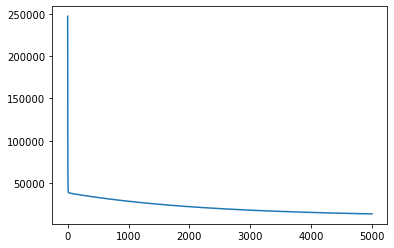

In [33]:
plt.plot(np.arange(Iterations), GD_model[4])

## <span style='color:Orange'> Mini-Batch Gradient Descent </span>

In [34]:
Iterations    = 4000
learning_rate = 0.001
batch_size    = 20

def Mini_Batch(X1, X2, X3, y, w0=1, w1=1, w2=1, w3=1, epochs=Iterations, learning_rate=learning_rate, batch_size = batch_size):
     N = (len(y))
     cost_history_mb = np.zeros(epochs)
     n_batches = int(N/batch_size)
           
     for j in range(epochs):         
          cost = 0.0 
          for i in range(0,N,batch_size):
              X1_i = X1[i:i+batch_size]
              X2_i = X2[i:i+batch_size]
              X3_i = X3[i:i+batch_size]
              y_i  = y[i:i+batch_size]
            
              y_current = w0 + (w1 * X1_i) + (w2 * X2_i) + (w3 * X3_i)
              cost = sum([data**2 for data in (y_i - y_current)]) / N
              w0_d = -(2/N) * sum(y_i - y_current)
              w1_d = -(2/N) * sum(X1_i * (y_i - y_current))
              w2_d = -(2/N) * sum(X2_i * (y_i - y_current))
              w3_d = -(2/N) * sum(X3_i * (y_i - y_current))
              
              w0 = w0 - (learning_rate * w0_d)                          
              w1 = w1 - (learning_rate * w1_d)
              w2 = w2 - (learning_rate * w2_d)
              w3 = w3 - (learning_rate * w3_d)
      
              cost += cost   
              cost_history_mb[i] = cost 
          print("w0 = {0}, w1 = {1}, w2 = {2}, w3 = {3}, iteration = {4}, cost = {5}".format(w0, w1, w2, w3, j, cost))
     print("MSE:", cost) 
     print("RMSE:", np.sqrt(cost))         
     return w0, w1, w2, w3, cost_history_mb

In [35]:
X1 = X_train['Weight']
X2 = X_train['Height']
X3 = X_train['Width']
y = y_train['Cost']
Mini_batch_Model = Mini_Batch(X1, X2, X3, y)

w0 = 1.2749875153776007, w1 = 12.261551834457753, w2 = 4.885936635629114, w3 = 2.941043992691143, iteration = 0, cost = 1821.5979677022256
w0 = 1.216760005691895, w1 = 13.649230526918874, w2 = 5.472581391199812, w3 = 3.226315706786536, iteration = 1, cost = 2227.2862209214754
w0 = 1.1164313017618461, w1 = 13.790296774504705, w2 = 5.640664503035481, w3 = 3.3021930012199534, iteration = 2, cost = 2309.229662503258
w0 = 1.010774701152244, w1 = 13.774512506913874, w2 = 5.754105716653416, w3 = 3.3513827550201585, iteration = 3, cost = 2319.463493934411
w0 = 0.9044358456773925, w1 = 13.739522299829659, w2 = 5.858907100125681, w3 = 3.396968085082718, iteration = 4, cost = 2320.145371303954
w0 = 0.7980020839669859, w1 = 13.702701909129333, w2 = 5.960911571923066, w3 = 3.4418687685321423, iteration = 5, cost = 2319.62334689144
w0 = 0.6915481217404413, w1 = 13.666235246430329, w2 = 6.060888658873523, w3 = 3.4864575279768784, iteration = 6, cost = 2318.9608175777917
w0 = 0.5850838994602009, w1 = 

w0 = -5.377329462869294, w1 = 12.379171138713945, w2 = 9.489307585622274, w3 = 5.712576218412872, iteration = 63, cost = 2288.0710855396583
w0 = -5.483619883981024, w1 = 12.366299694143155, w2 = 9.521776484999322, w3 = 5.74761396814494, iteration = 64, cost = 2287.540083693622
w0 = -5.589898963735524, w1 = 12.35365347278947, w2 = 9.553605698126274, w3 = 5.782552430012877, iteration = 65, cost = 2287.0075231172714
w0 = -5.696166511512528, w1 = 12.34122835543416, w2 = 9.584807057052226, w3 = 5.8173930827413125, iteration = 66, cost = 2286.4733803786057
w0 = -5.8024223402706925, w1 = 12.329020298713974, w2 = 9.615392175806129, w3 = 5.852137378094935, iteration = 67, cost = 2285.937634588102
w0 = -5.908666266481672, w1 = 12.31702533372373, w2 = 9.645372454413323, w3 = 5.886786741374912, iteration = 68, cost = 2285.400267274972
w0 = -6.014898110065402, w1 = 12.305239564644623, w2 = 9.674759082838039, w3 = 5.921342571906175, iteration = 69, cost = 2284.861262268489
w0 = -6.121117694326572, w

w0 = -11.83496426751556, w1 = 11.890438654401242, w2 = 10.631659497309792, w3 = 7.709843062662891, iteration = 124, cost = 2252.7892344479114
w0 = -11.94031457328172, w1 = 11.885898649816951, w2 = 10.640635437035789, w3 = 7.740772838844544, iteration = 125, cost = 2252.1691047447057
w0 = -12.045646607127239, w1 = 11.881432154429138, w2 = 10.649407303163132, w3 = 7.77165813866793, iteration = 126, cost = 2251.547986374834
w0 = -12.150960310214911, w1 = 11.877037842142247, w2 = 10.65797890003763, w3 = 7.802499447847254, iteration = 127, cost = 2250.925897311694
w0 = -12.256255624858813, w1 = 11.8727144112616, w2 = 10.666353961877578, w3 = 7.8332972434160135, iteration = 128, cost = 2250.3028554165035
w0 = -12.36153249450309, w1 = 11.86846058404391, w2 = 10.674536154065713, w3 = 7.864051993886692, iteration = 129, cost = 2249.6788784323617
w0 = -12.466790863701142, w1 = 11.864275106256052, w2 = 10.682529074417376, w3 = 7.894764159407497, iteration = 130, cost = 2249.053983978698
w0 = -12.

w0 = -18.434571719845973, w1 = 11.707184557182087, w2 = 10.91556815634641, w3 = 9.586623108185593, iteration = 187, cost = 2212.4148372120585
w0 = -18.538691393141555, w1 = 11.705436214840772, w2 = 10.916960634741079, w3 = 9.61543239256415, iteration = 188, cost = 2211.76143225357
w0 = -18.64279068397922, w1 = 11.703711668537103, w2 = 10.918291487758124, w3 = 9.644215758404165, iteration = 189, cost = 2211.107864832463
w0 = -18.746869576648777, w1 = 11.702010506233764, w2 = 10.919561892918804, w3 = 9.672973365938997, iteration = 190, cost = 2210.4541430733066
w0 = -18.85092805579687, w1 = 11.700332323456731, w2 = 10.920773006011819, w3 = 9.701705372703293, iteration = 191, cost = 2209.800274970471
w0 = -18.95496610642043, w1 = 11.698676723155971, w2 = 10.92192596149371, w3 = 9.730411933582506, iteration = 192, cost = 2209.14626838974
w0 = -19.058983713860194, w1 = 11.697043315568685, w2 = 10.923021872881874, w3 = 9.759093200861468, iteration = 193, cost = 2208.492131069913
w0 = -19.162

w0 = -24.748159457666244, w1 = 11.632495555790513, w2 = 10.92079776205317, w3 = 11.301167354110527, iteration = 248, cost = 2172.493489132421
w0 = -24.851017076304835, w1 = 11.631657227197083, w2 = 10.919975445959407, w3 = 11.328612928259894, iteration = 249, cost = 2171.8411518220296
w0 = -24.953853822522245, w1 = 11.630827487611093, w2 = 10.919134811078884, w3 = 11.356038810100914, iteration = 250, cost = 2171.188962983626
w0 = -25.05666969374822, w1 = 11.630006203516995, w2 = 10.918276234760567, w3 = 11.383445060216145, iteration = 251, cost = 2170.536925408269
w0 = -25.159464687527304, w1 = 11.629193243832981, w2 = 10.917400087364141, w3 = 11.41083173831228, iteration = 252, cost = 2169.885041835457
w0 = -25.262238801516716, w1 = 11.628388479866153, w2 = 10.916506732388806, w3 = 11.438198903236074, iteration = 253, cost = 2169.2333149539872
w0 = -25.36499203348427, w1 = 11.627591785268553, w2 = 10.91559652659969, w3 = 11.465546612989968, iteration = 254, cost = 2168.581747402816
w0

w0 = -31.085817290089018, w1 = 11.592823228211985, w2 = 10.846252351321997, w3 = 12.967444829509345, iteration = 310, cost = 2132.4109942949926
w0 = -31.18737933359994, w1 = 11.592336515110144, w2 = 10.844802331960627, w3 = 12.99375819351905, iteration = 311, cost = 2131.771596829845
w0 = -31.28892050021103, w1 = 11.59185339753928, w2 = 10.843347959899809, w3 = 13.020054433535288, iteration = 312, cost = 2131.132449731014
w0 = -31.39044079161519, w1 = 11.591373832411076, w2 = 10.84188935293161, w3 = 13.046333577334243, iteration = 313, cost = 2130.4935538137297
w0 = -31.491940209541525, w1 = 11.590897777406491, w2 = 10.840426626642541, w3 = 13.072595652408095, iteration = 314, cost = 2129.8549098758835
w0 = -31.59341875575471, w1 = 11.590425190961623, w2 = 10.83895989445423, w3 = 13.098840685970075, iteration = 315, cost = 2129.216518698336
w0 = -31.694876432054308, w1 = 11.589956032253797, w2 = 10.837489267663315, w3 = 13.125068704959393, iteration = 316, cost = 2128.5783810452153
w0 

w0 = -37.242973667551745, w1 = 11.568492689125963, w2 = 10.75312975012027, w3 = 14.54210006495117, iteration = 371, cost = 2093.887791777763
w0 = -37.34326633531282, w1 = 11.568168072440553, w2 = 10.751567829181914, w3 = 14.567411634434066, iteration = 372, cost = 2093.2646687082197
w0 = -37.44353827695126, w1 = 11.567845433174199, w2 = 10.750005847033663, w3 = 14.592707396103759, iteration = 373, cost = 2092.6418228188895
w0 = -37.5437894954922, w1 = 11.567524756593393, w2 = 10.7484438402976, w3 = 14.617987367026892, iteration = 374, cost = 2092.019254280577
w0 = -37.64401999397243, w1 = 11.567206028212883, w2 = 10.746881844887508, w3 = 14.643251564171756, iteration = 375, cost = 2091.396963258418
w0 = -37.744229775440054, w1 = 11.566889233791121, w2 = 10.745319896021938, w3 = 14.66850000440993, iteration = 376, cost = 2090.774949911981
w0 = -37.84441884295443, w1 = 11.566574359325793, w2 = 10.743758028237059, w3 = 14.693732704517858, iteration = 377, cost = 2090.1532143953673
w0 = -3

w0 = -43.02578553786647, w1 = 11.552566425386262, w2 = 10.663318023380148, w3 = 15.98453205431269, iteration = 429, cost = 2058.208107873123
w0 = -43.12488137329897, w1 = 11.552338202656752, w2 = 10.66179583571536, w3 = 16.00895252002957, iteration = 430, cost = 2057.601205455445
w0 = -43.22395667199549, w1 = 11.552111402214079, w2 = 10.660274858859061, w3 = 16.03335804491752, iteration = 431, cost = 2056.994583304684
w0 = -43.32301143739463, w1 = 11.551886018242401, w2 = 10.658755104098077, w3 = 16.05774864230066, iteration = 432, cost = 2056.3882413890915
w0 = -43.42204567293884, w1 = 11.551662045011053, w2 = 10.65723658247938, w3 = 16.082124325463187, iteration = 433, cost = 2055.782179675015
w0 = -43.52105938207442, w1 = 11.551439476872998, w2 = 10.655719304814532, w3 = 16.10648510764996, iteration = 434, cost = 2055.1763981269355
w0 = -43.62005256825137, w1 = 11.551218308263312, w2 = 10.654203281684065, w3 = 16.13083100206702, iteration = 435, cost = 2054.570896707504
w0 = -43.719

w0 = -49.22885334567723, w1 = 11.540776698620618, w2 = 10.570116679498213, w3 = 17.494350625218853, iteration = 492, cost = 2020.518438863041
w0 = -49.32666220039794, w1 = 11.540629351032576, w2 = 10.568685453270751, w3 = 17.517854528331828, iteration = 493, cost = 2019.929073376717
w0 = -49.424450740315294, w1 = 11.540483178044488, w2 = 10.567255817257081, w3 = 17.541344269345498, iteration = 494, cost = 2019.3399835593625
w0 = -49.52221896900971, w1 = 11.54033817705883, w2 = 10.56582777379864, w3 = 17.564819859848875, iteration = 495, cost = 2018.7511693097726
w0 = -49.61996689006269, w1 = 11.540194345505215, w2 = 10.56440132516357, w3 = 17.588281311412207, iteration = 496, cost = 2018.1626305262023
w0 = -49.71769450705683, w1 = 11.540051680839916, w2 = 10.562976473548101, w3 = 17.61172863558714, iteration = 497, cost = 2017.5743671063788
w0 = -49.81540182357577, w1 = 11.539910180545379, w2 = 10.5615532210779, w3 = 17.63516184390691, iteration = 498, cost = 2016.9863789475135
w0 = -4

w0 = -55.158146710712714, w1 = 11.533856257531356, w2 = 10.485774956869719, w3 = 18.90258027725866, iteration = 553, cost = 1985.067751708272
w0 = -55.25472294431593, w1 = 11.533776577526671, w2 = 10.484442971089901, w3 = 18.925240901998762, iteration = 554, cost = 1984.4950022576204
w0 = -55.35127908288529, w1 = 11.533697949819532, w2 = 10.483112622912621, w3 = 18.947888042302296, iteration = 555, cost = 1983.9225216331129
w0 = -55.44781513003783, w1 = 11.533620372836303, w2 = 10.481783912015663, w3 = 18.970521708851933, iteration = 556, cost = 1983.350309715495
w0 = -55.54433108939086, w1 = 11.53354384501276, w2 = 10.4804568380542, w3 = 18.993141912318336, iteration = 557, cost = 1982.778366385389
w0 = -55.64082696456187, w1 = 11.53346836479394, w2 = 10.479131400661245, w3 = 19.01574866336025, iteration = 558, cost = 1982.206691523297
w0 = -55.73730275916858, w1 = 11.533393930633988, w2 = 10.477807599448086, w3 = 19.03834197262452, iteration = 559, cost = 1981.6352850096112
w0 = -55.

w0 = -61.20334755758906, w1 = 11.530833747459354, w2 = 10.405034456752766, w3 = 20.30428198435512, iteration = 616, cost = 1949.5047666130527
w0 = -61.29866487373053, w1 = 11.53081758714167, w2 = 10.403804327836548, w3 = 20.326113507674513, iteration = 617, cost = 1948.9487172010724
w0 = -61.39396232293143, w1 = 11.530802393585052, w2 = 10.402575785664682, w3 = 20.347932198128007, iteration = 618, cost = 1948.3929289742503
w0 = -61.48923990881268, w1 = 11.530788165593194, w2 = 10.401348829103233, w3 = 20.36973806573353, iteration = 619, cost = 1947.837401810623
w0 = -61.58449763499512, w1 = 11.530774901973372, w2 = 10.400123457012201, w3 = 20.39153112049958, iteration = 620, cost = 1947.282135588242
w0 = -61.679735505099536, w1 = 11.530762601536386, w2 = 10.39889966824565, w3 = 20.413311372425206, iteration = 621, cost = 1946.7271301851704
w0 = -61.774953522746635, w1 = 11.530751263096517, w2 = 10.397677461651833, w3 = 20.435078831500046, iteration = 622, cost = 1946.1723854794877
w0 =

w0 = -67.1696820730024, w1 = 11.531658065447253, w2 = 10.330587408792528, w3 = 21.65499770772761, iteration = 679, cost = 1914.9789188387538
w0 = -67.26375483948996, w1 = 11.531700592953007, w2 = 10.32945485518685, w3 = 21.67603996259066, iteration = 680, cost = 1914.439086915602
w0 = -67.35780796693527, w1 = 11.531744017332324, w2 = 10.32832380920863, w3 = 21.697069998061117, iteration = 681, cost = 1913.899508551189
w0 = -67.45184145895098, w1 = 11.531788337546232, w2 = 10.327194269529613, w3 = 21.718087823598935, iteration = 682, cost = 1913.3601836258104
w0 = -67.54585531914952, w1 = 11.531833552557481, w2 = 10.326066234820553, w3 = 21.73909344865573, iteration = 683, cost = 1912.8211120198146
w0 = -67.6398495511432, w1 = 11.531879661330544, w2 = 10.324939703751237, w3 = 21.76008688267475, iteration = 684, cost = 1912.2822936135985
w0 = -67.7338241585441, w1 = 11.531926662831589, w2 = 10.323814674990539, w3 = 21.781068135090905, iteration = 685, cost = 1911.743728287614
w0 = -67.82

w0 = -73.15089721288317, w1 = 11.536145633366816, w2 = 10.261087645082672, w3 = 22.977456637610565, iteration = 743, cost = 1880.9358974692313
w0 = -73.24372035554794, w1 = 11.536243530146875, w2 = 10.260048881547936, w3 = 22.997735581403028, iteration = 744, cost = 1880.4120542798412
w0 = -73.33652408997298, w1 = 11.536342260285483, w2 = 10.25901153993999, w3 = 23.018002894842702, iteration = 745, cost = 1879.8884571012109
w0 = -73.42930841975743, w1 = 11.536441822831703, w2 = 10.257975618924995, w3 = 23.038258586875887, iteration = 746, cost = 1879.3651058173273
w0 = -73.52207334850021, w1 = 11.536542216835729, w2 = 10.25694111716965, w3 = 23.05850266644117, iteration = 747, cost = 1878.8420003122424
w0 = -73.61481887979998, w1 = 11.536643441348854, w2 = 10.255908033341209, w3 = 23.07873514246943, iteration = 748, cost = 1878.3191404700658
w0 = -73.70754501725523, w1 = 11.5367454954235, w2 = 10.254876366107483, w3 = 23.098956023883826, iteration = 749, cost = 1877.7965261749698
w0 = 

w0 = -78.86936706169303, w1 = 11.543755745316306, w2 = 10.199323087561753, w3 = 24.213092249207914, iteration = 805, cost = 1848.9184729029066
w0 = -78.96099369026904, w1 = 11.543903551966155, w2 = 10.198369986834459, w3 = 24.232666740990542, iteration = 806, cost = 1848.4096653363536
w0 = -79.05260113328609, w1 = 11.544052134972127, w2 = 10.197418226691962, w3 = 24.252230142786978, iteration = 807, cost = 1847.9010967046593
w0 = -79.14418939432767, w1 = 11.544201493445167, w2 = 10.196467805849174, w3 = 24.271782463079408, iteration = 808, cost = 1847.3927668956462
w0 = -79.23575847697701, w1 = 11.54435162649712, w2 = 10.195518723021953, w3 = 24.29132371034275, iteration = 809, cost = 1846.8846757971987
w0 = -79.3273083848171, w1 = 11.544502533240738, w2 = 10.194570976927116, w3 = 24.310853893044666, iteration = 810, cost = 1846.3768232972634
w0 = -79.41883912143062, w1 = 11.544654212789672, w2 = 10.193624566282434, w3 = 24.33037301964559, iteration = 811, cost = 1845.8692092838448
w0 

w0 = -84.15210824681775, w1 = 11.553584789838721, w2 = 10.146219994418695, w3 = 25.330339703284807, iteration = 863, cost = 1819.7991580648036
w0 = -84.24262802803794, w1 = 11.553776182637082, w2 = 10.145342553723998, w3 = 25.349284775821335, iteration = 864, cost = 1819.3040251823766
w0 = -84.33312883108538, w1 = 11.553968301664499, w2 = 10.144466380720047, w3 = 25.368219238547425, iteration = 865, cost = 1818.8091248295964
w0 = -84.42361065952728, w1 = 11.554161146081473, w2 = 10.143591474180187, w3 = 25.387143099535255, iteration = 866, cost = 1818.3144568978114
w0 = -84.51407351693058, w1 = 11.554354715049312, w2 = 10.142717832878803, w3 = 25.40605636685013, iteration = 867, cost = 1817.8200212784338
w0 = -84.60451740686196, w1 = 11.554549007730138, w2 = 10.141845455591312, w3 = 25.424959048550477, iteration = 868, cost = 1817.3258178629308
w0 = -84.69494233288773, w1 = 11.554744023286878, w2 = 10.140974341094175, w3 = 25.44385115268785, iteration = 869, cost = 1816.8318465428317
w

w0 = -89.72858170497031, w1 = 11.566793138138692, w2 = 10.094170063358922, w3 = 26.485172540562733, iteration = 925, cost = 1789.5365568137317
w0 = -89.81793157384843, w1 = 11.567027999728403, w2 = 10.093368939272464, w3 = 26.503474812552508, iteration = 926, cost = 1789.0556375471963
w0 = -89.90726268515519, w1 = 11.567263536992424, w2 = 10.09256900879303, w3 = 26.52176696242712, iteration = 927, cost = 1788.574944185324
w0 = -89.99657504243899, w1 = 11.56749974913962, w2 = 10.091770270758433, w3 = 26.54004899784362, iteration = 928, cost = 1788.0944766230873
w0 = -90.08586864924793, w1 = 11.567736635379598, w2 = 10.09097272400751, w3 = 26.558320926452552, iteration = 929, cost = 1787.6142347555126
w0 = -90.1751435091298, w1 = 11.567974194922723, w2 = 10.09017636738013, w3 = 26.576582755897963, iteration = 930, cost = 1787.1342184776852
w0 = -90.26439962563202, w1 = 11.568212426980105, w2 = 10.08938119971719, w3 = 26.594834493817398, iteration = 931, cost = 1786.6544276847492
w0 = -90

w0 = -95.58560020553145, w1 = 11.583707656232509, w2 = 10.043803716801118, w3 = 27.671756301091023, iteration = 991, cost = 1758.2756852782834
w0 = -95.67371967138463, w1 = 11.583985449140574, w2 = 10.04307892463821, w3 = 27.68940664408635, iteration = 992, cost = 1757.8094530081923
w0 = -95.76182061317081, w1 = 11.58426386708349, w2 = 10.042355251561997, w3 = 27.70704735662866, iteration = 993, cost = 1757.3434398310533
w0 = -95.84990303441691, w1 = 11.584542909318055, w2 = 10.041632696477006, w3 = 27.724678445957466, iteration = 994, cost = 1756.8776456454998
w0 = -95.93796693864951, w1 = 11.584822575101777, w2 = 10.040911258288755, w3 = 27.742299919306156, iteration = 995, cost = 1756.4120703502258
w0 = -96.02601232939485, w1 = 11.585102863692857, w2 = 10.040190935903752, w3 = 27.759911783901973, iteration = 996, cost = 1755.9467138439727
w0 = -96.11403921017884, w1 = 11.585383774350207, w2 = 10.039471728229485, w3 = 27.77751404696604, iteration = 997, cost = 1755.4815760255406
w0 =

w0 = -101.01411127644607, w1 = 11.602085037250072, w2 = 10.000941910861602, w3 = 28.748136787672777, iteration = 1053, cost = 1729.7797855967553
w0 = -101.101088906673, w1 = 11.602400203129621, w2 = 10.000284467456842, w3 = 28.76520350323736, iteration = 1054, cost = 1729.326947430733
w0 = -101.18804823085502, w1 = 11.602715949269246, w2 = 9.999628077057695, w3 = 28.782261025787758, iteration = 1055, cost = 1728.8743221736795
w0 = -101.27498925249765, w1 = 11.603032274968069, w2 = 9.998972738628437, w3 = 28.799309362192755, iteration = 1056, cost = 1728.4219097275006
w0 = -101.36191197510605, w1 = 11.603349179525878, w2 = 9.998318451134292, w3 = 28.81634851931533, iteration = 1057, cost = 1727.969709994154
w0 = -101.44881640218505, w1 = 11.603666662243118, w2 = 9.997665213541419, w3 = 28.833378504012657, iteration = 1058, cost = 1727.5177228756468
w0 = -101.53570253723903, w1 = 11.6039847224209, w2 = 9.997013024816905, w3 = 28.850399323136095, iteration = 1059, cost = 1727.065948274041

w0 = -106.28637263492031, w1 = 11.622347149581826, w2 = 9.962728073057017, w3 = 29.772627424240724, iteration = 1114, cost = 1702.5427770646709
w0 = -106.372239998596, w1 = 11.62269645226146, w2 = 9.962133000998126, w3 = 29.789145729165412, iteration = 1115, cost = 1702.1027486628134
w0 = -106.45808926940448, w1 = 11.623046293639018, w2 = 9.96153892045521, w3 = 29.805655249611117, iteration = 1116, cost = 1701.662927278822
w0 = -106.54392045082913, w1 = 11.623396673052962, w2 = 9.960945830448361, w3 = 29.822155992101063, iteration = 1117, cost = 1701.2233128176667
w0 = -106.62973354635298, w1 = 11.623747589842383, w2 = 9.960353729998557, w3 = 29.838647963152958, iteration = 1118, cost = 1700.7839051843655
w0 = -106.71552855945869, w1 = 11.624099043346995, w2 = 9.959762618127666, w3 = 29.855131169279, iteration = 1119, cost = 1700.3447042839834
w0 = -106.80130549362852, w1 = 11.62445103290714, w2 = 9.959172493858443, w3 = 29.871605616985896, iteration = 1120, cost = 1699.905710021639
w0

w0 = -111.57606710403869, w1 = 11.644997920194815, w2 = 9.927671993515808, w3 = 30.780394543929052, iteration = 1176, cost = 1675.6489199557209
w0 = -111.66081928286049, w1 = 11.645379394572707, w2 = 9.92713657567521, w3 = 30.796380340753753, iteration = 1177, cost = 1675.2215487904032
w0 = -111.74555358407396, w1 = 11.645761367797395, w2 = 9.926602090250453, w3 = 30.812357747295458, iteration = 1178, cost = 1674.7943788422872
w0 = -111.830270011139, w1 = 11.646143839245148, w2 = 9.926068536315372, w3 = 30.8283267697446, iteration = 1179, cost = 1674.3674100193114
w0 = -111.91496856751515, w1 = 11.646526808292839, w2 = 9.92553591294464, w3 = 30.844287414286377, iteration = 1180, cost = 1673.9406422294587
w0 = -111.99964925666154, w1 = 11.646910274317914, w2 = 9.925004219213777, w3 = 30.86023968710079, iteration = 1181, cost = 1673.5140753807605
w0 = -112.0843120820369, w1 = 11.647294236698432, w2 = 9.92447345419914, w3 = 30.8761835943626, iteration = 1182, cost = 1673.0877093812942
w0 

w0 = -116.79702627030859, w1 = 11.669569388714752, w2 = 9.896204723457183, w3 = 31.755879160748314, iteration = 1238, cost = 1649.528953474684
w0 = -116.88067656535658, w1 = 11.669980634243624, w2 = 9.895725395478237, w3 = 31.771356271195593, iteration = 1239, cost = 1649.1138854338312
w0 = -116.96430919657107, w1 = 11.670392341048887, w2 = 9.89524694405859, w3 = 31.786825365464406, iteration = 1240, cost = 1648.699012989379
w0 = -117.04792416738755, w1 = 11.670804508542563, w2 = 9.894769368322939, w3 = 31.802286449429978, iteration = 1241, cost = 1648.2843360521
w0 = -117.13152148124115, w1 = 11.671217136137232, w2 = 9.894292667396778, w3 = 31.817739528962598, iteration = 1242, cost = 1647.8698545328043
w0 = -117.21510114156658, w1 = 11.671630223246039, w2 = 9.893816840406402, w3 = 31.833184609927613, iteration = 1243, cost = 1647.455568342358
w0 = -117.29866315179811, w1 = 11.67204376928268, w2 = 9.893341886478892, w3 = 31.848621698185433, iteration = 1244, cost = 1647.0414773916618


w0 = -121.8674928867513, w1 = 11.695478629850705, w2 = 9.868538730136429, w3 = 32.685522186086104, iteration = 1299, cost = 1624.5645561376916
w0 = -121.95007196041833, w1 = 11.695916957143725, w2 = 9.868111298808332, w3 = 32.700520885593484, iteration = 1300, cost = 1624.161257777598
w0 = -122.03263357907753, w1 = 11.69635571085388, w2 = 9.867684692080386, w3 = 32.71551191841636, iteration = 1301, cost = 1623.758149651467
w0 = -122.11517774613961, w1 = 11.696794890426464, w2 = 9.867258909124663, w3 = 32.73049529013611, iteration = 1302, cost = 1623.3552316727355
w0 = -122.19770446501485, w1 = 11.6972344953073, w2 = 9.866833949113989, w3 = 32.745471006329446, iteration = 1303, cost = 1622.952503754882
w0 = -122.28021373911312, w1 = 11.697674524942745, w2 = 9.866409811221947, w3 = 32.76043907256836, iteration = 1304, cost = 1622.5499658114286
w0 = -122.36270557184386, w1 = 11.698114978779673, w2 = 9.865986494622872, w3 = 32.77539949442019, iteration = 1305, cost = 1622.1476177559387
w0 

w0 = -127.11750614479952, w1 = 11.724368455526793, w2 = 9.842811499057609, w3 = 33.630212514029914, iteration = 1363, cost = 1599.1333930923108
w0 = -127.19897495658513, w1 = 11.724832977018979, w2 = 9.842435204081895, w3 = 33.64473160507535, iteration = 1364, cost = 1598.7420969549012
w0 = -127.28042653080618, w1 = 11.725297890476398, w2 = 9.842059682213955, w3 = 33.65924337736332, iteration = 1365, cost = 1598.3509855962984
w0 = -127.36186087084654, w1 = 11.725763195377336, w2 = 9.841684932672871, w3 = 33.67374783618332, iteration = 1366, cost = 1597.960058932613
w0 = -127.44327798008966, w1 = 11.726228891200577, w2 = 9.841310954678432, w3 = 33.68824498682041, iteration = 1367, cost = 1597.5693168799987
w0 = -127.52467786191855, w1 = 11.726694977425403, w2 = 9.840937747451145, w3 = 33.70273483455524, iteration = 1368, cost = 1597.1787593546505
w0 = -127.60606051971577, w1 = 11.727161453531599, w2 = 9.840565310212222, w3 = 33.71721738466401, iteration = 1369, cost = 1596.7883862728017

w0 = -131.97523994995868, w1 = 11.752915911990259, w2 = 9.821575822554072, w3 = 34.488582642320324, iteration = 1423, cost = 1575.9798324812907
w0 = -132.05568048266005, w1 = 11.75340304486676, w2 = 9.821244555917582, w3 = 34.502671820527844, iteration = 1424, cost = 1575.5994759765683
w0 = -132.13610398006955, w1 = 11.753890539276094, w2 = 9.820914016774706, w3 = 34.51675398963363, iteration = 1425, cost = 1575.2192992888151
w0 = -132.21651044554514, w1 = 11.75437839472579, w2 = 9.820584204386211, w3 = 34.53082915466797, iteration = 1426, cost = 1574.839302336547
w0 = -132.29689988244445, w1 = 11.75486661072385, w2 = 9.820255118013549, w3 = 34.544897320656965, iteration = 1427, cost = 1574.459485038321
w0 = -132.37727229412465, w1 = 11.755355186778747, w2 = 9.819926756918841, w3 = 34.55895849262251, iteration = 1428, cost = 1574.0798473127331
w0 = -132.4576276839424, w1 = 11.755844122399427, w2 = 9.819599120364884, w3 = 34.573012675582305, iteration = 1429, cost = 1573.7003890784179
w

w0 = -137.00985667504975, w1 = 11.784292079615867, w2 = 9.802097862516899, w3 = 35.362709372568524, iteration = 1486, cost = 1552.3653426670955
w0 = -137.08923052519285, w1 = 11.784801045833023, w2 = 9.801811010758401, w3 = 35.37636663670686, iteration = 1487, cost = 1551.996157039456
w0 = -137.16858755074256, w1 = 11.78531034346623, w2 = 9.801524841218919, w3 = 35.39001720058303, iteration = 1488, cost = 1551.6271461710426
w0 = -137.24792775502917, w1 = 11.785819972052062, w2 = 9.801239353200657, w3 = 35.4036610689694, iteration = 1489, cost = 1551.2583099827937
w0 = -137.32725114138248, w1 = 11.786329931127533, w2 = 9.800954546006466, w3 = 35.417298246634424, iteration = 1490, cost = 1550.8896483956903
w0 = -137.40655771313192, w1 = 11.786840220230111, w2 = 9.800670418939827, w3 = 35.43092873834252, iteration = 1491, cost = 1550.5211613307495
w0 = -137.4858474736064, w1 = 11.787350838897707, w2 = 9.800386971304873, w3 = 35.444552548854155, iteration = 1492, cost = 1550.1528487090245


w0 = -141.58583149967177, w1 = 11.814345839505144, w2 = 9.786566906038152, w3 = 36.143900743373976, iteration = 1544, cost = 1531.2390297129377
w0 = -141.66423501452948, w1 = 11.814873275451076, w2 = 9.78631848901215, w3 = 36.15717715972235, iteration = 1545, cost = 1530.8798505893685
w0 = -141.7426218972087, w1 = 11.815401016661996, w2 = 9.786070714772228, w3 = 36.170447146134045, iteration = 1546, cost = 1530.520841701192
w0 = -141.82099215101357, w1 = 11.81592906269979, w2 = 9.785823582656732, w3 = 36.18371070715627, iteration = 1547, cost = 1530.1620029714995
w0 = -141.89934577924785, w1 = 11.816457413126765, w2 = 9.785577092004614, w3 = 36.19696784733242, iteration = 1548, cost = 1529.8033343234138
w0 = -141.97768278521488, w1 = 11.816986067505653, w2 = 9.785331242155436, w3 = 36.210218571202105, iteration = 1549, cost = 1529.4448356800951
w0 = -142.05600317221746, w1 = 11.817515025399615, w2 = 9.785086032449362, w3 = 36.22346288330119, iteration = 1550, cost = 1529.0865069647427


w0 = -146.49290123283245, w1 = 11.84815333899156, w2 = 9.772146077332376, w3 = 36.96793564961926, iteration = 1607, cost = 1508.9401818928204
w0 = -146.5702633554448, w1 = 11.848699167636317, w2 = 9.771936887395244, w3 = 36.980815712309365, iteration = 1608, cost = 1508.5915788197601
w0 = -146.6476090531518, w1 = 11.849245274759454, w2 = 9.771728299723765, w3 = 36.99368962427554, iteration = 1609, cost = 1508.2431412067194
w0 = -146.72493832922882, w1 = 11.849791659948878, w2 = 9.771520313693474, w3 = 37.006557389832935, iteration = 1610, cost = 1507.8948689790288
w0 = -146.8022511869507, w1 = 11.850338322792904, w2 = 9.771312928680477, w3 = 37.01941901329311, iteration = 1611, cost = 1507.5467620620584
w0 = -146.879547629592, w1 = 11.850885262880254, w2 = 9.77110614406145, w3 = 37.032274498964064, iteration = 1612, cost = 1507.1988203812123
w0 = -146.95682766042663, w1 = 11.85143247980004, w2 = 9.770899959213645, w3 = 37.0451238511502, iteration = 1613, cost = 1506.8510438619262
w0 = 

w0 = -151.18205077413546, w1 = 11.88194387802036, w2 = 9.760465458980619, w3 = 37.74251710069687, iteration = 1668, cost = 1487.975517136815
w0 = -151.25841695476214, w1 = 11.882505953982037, w2 = 9.760291884847955, w3 = 37.75502973867576, iteration = 1669, cost = 1487.6368717320952
w0 = -151.33476690943164, w1 = 11.883068284006248, w2 = 9.76011887591971, w3 = 37.767536482712146, iteration = 1670, cost = 1487.298387295942
w0 = -151.41110064139104, w1 = 11.883630867704726, w2 = 9.75994643160548, w3 = 37.78003733690834, iteration = 1671, cost = 1486.9600637557814
w0 = -151.48741815388686, w1 = 11.884193704689597, w2 = 9.759774551315395, w3 = 37.792532305363274, iteration = 1672, cost = 1486.621901039075
w0 = -151.56371945016514, w1 = 11.884756794573354, w2 = 9.759603234460139, w3 = 37.805021392172456, iteration = 1673, cost = 1486.2838990733192
w0 = -151.64000453347145, w1 = 11.885320136968872, w2 = 9.759432480450934, w3 = 37.81750460142803, iteration = 1674, cost = 1485.9460577860395
w0

w0 = -155.73541255073093, w1 = 11.916105023370811, w2 = 9.751031481318007, w3 = 38.48298184249239, iteration = 1728, cost = 1467.939240097561
w0 = -155.81081090502653, w1 = 11.916681668687861, w2 = 9.75089079277991, w3 = 38.49514799024175, iteration = 1729, cost = 1467.6101254963517
w0 = -155.88619322735184, w1 = 11.917258545432153, w2 = 9.750750634966629, w3 = 38.507308484276976, iteration = 1730, cost = 1467.2811675683047
w0 = -155.96155952092556, w1 = 11.917835653237608, w2 = 9.750611007319494, w3 = 38.51946332850178, iteration = 1731, cost = 1466.9523662428337
w0 = -156.03690978896597, w1 = 11.918412991738505, w2 = 9.750471909280353, w3 = 38.53161252681665, iteration = 1732, cost = 1466.6237214493847
w0 = -156.11224403469075, w1 = 11.918990560569487, w2 = 9.750333340291562, w3 = 38.543756083118886, iteration = 1733, cost = 1466.2952331174386
w0 = -156.1875622613172, w1 = 11.919568359365545, w2 = 9.750195299795998, w3 = 38.55589400130255, iteration = 1734, cost = 1465.9669011765075


w0 = -160.5287205753772, w1 = 11.953461854631456, w2 = 9.743074403224197, w3 = 39.25037802901387, iteration = 1792, cost = 1447.1888383523692
w0 = -160.60309935265, w1 = 11.954052588051045, w2 = 9.742966575949588, w3 = 39.26219007645687, iteration = 1793, cost = 1446.8696098759665
w0 = -160.67746230298906, w1 = 11.954643530180237, w2 = 9.74285924466354, w3 = 39.273996713642426, iteration = 1794, cost = 1446.5505336200395
w0 = -160.75180942958252, w1 = 11.955234680675316, w2 = 9.74275240883941, w3 = 39.285797944273575, iteration = 1795, cost = 1446.231609516047
w0 = -160.82614073561803, w1 = 11.955826039192907, w2 = 9.742646067951044, w3 = 39.2975937720503, iteration = 1796, cost = 1445.912837495482
w0 = -160.90045622428275, w1 = 11.956417605389975, w2 = 9.742540221472765, w3 = 39.309384200669534, iteration = 1797, cost = 1445.594217489864
w0 = -160.97475589876342, w1 = 11.957009378923823, w2 = 9.74243486887939, w3 = 39.32116923382517, iteration = 1798, cost = 1445.2757494307477
w0 = -1

w0 = -164.81662590518386, w1 = 11.988058926823967, w2 = 9.73762424445852, w3 = 39.926646604763334, iteration = 1850, cost = 1428.9231054941147
w0 = -164.89009197546184, w1 = 11.988661207579032, w2 = 9.737544328789662, w3 = 39.938150885451094, iteration = 1851, cost = 1428.6125934674383
w0 = -164.96354240292266, w1 = 11.989263677659645, w2 = 9.737464879354034, w3 = 39.949649965699784, iteration = 1852, cost = 1428.302229737169
w0 = -165.03697719072645, w1 = 11.989866336741265, w2 = 9.73738589565247, w3 = 39.961143849039985, iteration = 1853, cost = 1427.9920142365565
w0 = -165.1103963420329, w1 = 11.990469184499675, w2 = 9.737307377186264, w3 = 39.97263253899935, iteration = 1854, cost = 1427.6819468988792
w0 = -165.18379986000127, w1 = 11.991072220610976, w2 = 9.737229323457173, w3 = 39.98411603910267, iteration = 1855, cost = 1427.3720276574488
w0 = -165.2571877477902, w1 = 11.991675444751596, w2 = 9.737151733967412, w3 = 39.99559435287182, iteration = 1856, cost = 1427.062256445605
w

w0 = -169.05189770881464, w1 = 12.023294286951579, w2 = 9.73374461078827, w3 = 40.58540627996909, iteration = 1908, cost = 1411.1564950625836
w0 = -169.1244617044757, w1 = 12.023907021930809, w2 = 9.733690925587256, w3 = 40.59661468285724, iteration = 1909, cost = 1410.8544748189724
w0 = -169.19701023980627, w1 = 12.024519927935296, w2 = 9.733637678417868, w3 = 40.60781808536574, iteration = 1910, cost = 1410.5525990499293
w0 = -169.26954331793831, w1 = 12.025133004658692, w2 = 9.733584868807021, w3 = 40.61901649086117, iteration = 1911, cost = 1410.2508676904388
w0 = -169.3420609420033, w1 = 12.025746251794953, w2 = 9.73353249628208, w3 = 40.630209902707364, iteration = 1912, cost = 1409.9492806755143
w0 = -169.41456311513215, w1 = 12.026359669038332, w2 = 9.733480560370836, w3 = 40.641398324265396, iteration = 1913, cost = 1409.647837940197
w0 = -169.48704984045537, w1 = 12.026973256083398, w2 = 9.733429060601521, w3 = 40.65258175889361, iteration = 1914, cost = 1409.3465394195605
w0

w0 = -173.306822421241, w1 = 12.059728453313411, w2 = 9.73131147408099, w3 = 41.23825460303252, iteration = 1967, cost = 1393.5823963759415
w0 = -173.37847960025934, w1 = 12.060350764413672, w2 = 9.73128283736809, w3 = 41.24917365525808, iteration = 1968, cost = 1393.2887898384688
w0 = -173.45012150289438, w1 = 12.060973228977804, w2 = 9.731254611511906, w3 = 41.26008790109516, iteration = 1969, cost = 1392.995323989441
w0 = -173.52174813224914, w1 = 12.061595846717001, w2 = 9.731226796064535, w3 = 41.27099734375182, iteration = 1970, cost = 1392.7019987655506
w0 = -173.5933594914262, w1 = 12.062218617342744, w2 = 9.731199390578494, w3 = 41.28190198643348, iteration = 1971, cost = 1392.4088141035204
w0 = -173.6649555835276, w1 = 12.062841540566799, w2 = 9.731172394606714, w3 = 41.29280183234298, iteration = 1972, cost = 1392.1157699401006
w0 = -173.7365364116548, w1 = 12.063464616101221, w2 = 9.731145807702543, w3 = 41.30369688468053, iteration = 1973, cost = 1391.8228662120675
w0 = -1

w0 = -177.57931990929032, w1 = 12.097329006935803, w2 = 9.730305361129375, w3 = 41.8849989444129, iteration = 2027, cost = 1376.2128701342388
w0 = -177.65006598080805, w1 = 12.097960024446065, w2 = 9.730300597073178, w3 = 41.8956352031067, iteration = 2028, cost = 1375.9275938186192
w0 = -177.72079696125158, w1 = 12.09859117859468, w2 = 9.730296217722431, w3 = 41.906266843338855, iteration = 2029, cost = 1375.6424544429856
w0 = -177.79151285369437, w1 = 12.099222469109733, w2 = 9.730292222653512, w3 = 41.91689386816432, iteration = 2030, cost = 1375.357451945717
w0 = -177.86221366120938, w1 = 12.099853895719587, w2 = 9.730288611443191, w3 = 41.927516280635565, iteration = 2031, cost = 1375.072586265217
w0 = -177.93289938686897, w1 = 12.100485458152876, w2 = 9.730285383668633, w3 = 41.93813408380257, iteration = 2032, cost = 1374.7878573399187
w0 = -178.00357003374515, w1 = 12.101117156138507, w2 = 9.730282538907394, w3 = 41.94874728071284, iteration = 2033, cost = 1374.5032651082834
w0

w0 = -181.937155082661, w1 = 12.136700343085261, w2 = 9.73072166356378, w3 = 42.53582763850345, iteration = 2089, cost = 1358.7823768405854
w0 = -182.00697130068457, w1 = 12.137339328203577, w2 = 9.730739964867366, w3 = 42.5461832367085, iteration = 2090, cost = 1358.5054753131328
w0 = -182.07677261724888, w1 = 12.137978433610106, w2 = 9.73075862534298, w3 = 42.556534401240825, iteration = 2091, cost = 1358.2287069567874
w0 = -182.14655903539662, w1 = 12.138617659049453, w2 = 9.730777644590757, w3 = 42.566881135005325, iteration = 2092, cost = 1357.9520717116136
w0 = -182.21633055816991, w1 = 12.139257004266472, w2 = 9.730797022211188, w3 = 42.57722344090457, iteration = 2093, cost = 1357.675569517703
w0 = -182.28608718861048, w1 = 12.139896469006283, w2 = 9.730816757805144, w3 = 42.58756132183874, iteration = 2094, cost = 1357.3992003151727
w0 = -182.3558289297595, w1 = 12.140536053014259, w2 = 9.730836850973871, w3 = 42.59789478070569, iteration = 2095, cost = 1357.122964044166
w0 = 

w0 = -186.09985645858345, w1 = 12.175243745436086, w2 = 9.732441972364057, w3 = 43.14941419881048, iteration = 2149, cost = 1342.4019600203414
w0 = -186.1687839575389, w1 = 12.175889504529835, w2 = 9.732481128793784, w3 = 43.15950883874518, iteration = 2150, cost = 1342.1329435818511
w0 = -186.23769673671376, w1 = 12.176535369037806, w2 = 9.732520621050883, w3 = 43.169599215202794, iteration = 2151, cost = 1341.8640567652167
w0 = -186.30659479912083, w1 = 12.177181338719713, w2 = 9.732560448757246, w3 = 43.179685330950484, iteration = 2152, cost = 1341.5952995120854
w0 = -186.3754781477724, w1 = 12.177827413335518, w2 = 9.732600611535103, w3 = 43.1897671887532, iteration = 2153, cost = 1341.3266717641272
w0 = -186.4443467856802, w1 = 12.178473592645421, w2 = 9.73264110900705, w3 = 43.19984479137368, iteration = 2154, cost = 1341.0581734630439
w0 = -186.51320071585556, w1 = 12.179119876409871, w2 = 9.732681940796029, w3 = 43.209918141572366, iteration = 2155, cost = 1340.7898045505558
w

w0 = -190.0734123509334, w1 = 12.212864711211623, w2 = 9.735256649073927, w3 = 43.727940231939044, iteration = 2207, cost = 1327.0114819040903
w0 = -190.14149106731588, w1 = 12.213516194600636, w2 = 9.735314669220678, w3 = 43.737792096192834, iteration = 2208, cost = 1326.7498878698968
w0 = -190.2095552378327, w1 = 12.214167769865309, w2 = 9.735373003837676, w3 = 43.74763985383007, iteration = 2209, cost = 1326.4884201155526
w0 = -190.27760486546757, w1 = 12.214819436779198, w2 = 9.735431652566753, w3 = 43.75748350749143, iteration = 2210, cost = 1326.2270785841906
w0 = -190.3456399532039, w1 = 12.215471195116091, w2 = 9.735490615050077, w3 = 43.76732305981546, iteration = 2211, cost = 1325.965863218965
w0 = -190.41366050402434, w1 = 12.21612304465001, w2 = 9.735549890930148, w3 = 43.7771585134386, iteration = 2212, cost = 1325.7047739630589
w0 = -190.48166652091126, w1 = 12.216774985155205, w2 = 9.7356094798498, w3 = 43.786989870995164, iteration = 2213, cost = 1325.443810759678
w0 = 

w0 = -193.9980254402292, w1 = 12.25079572863704, w2 = 9.739130726005447, w3 = 44.29264070879132, iteration = 2265, cost = 1312.046024405286
w0 = -194.06526541313835, w1 = 12.251452173578384, w2 = 9.739206403582731, w3 = 44.3022586895097, iteration = 2266, cost = 1311.7916613708726
w0 = -194.13249101241306, w1 = 12.252108697639029, w2 = 9.739282375400954, w3 = 44.311872713313136, iteration = 2267, cost = 1311.5374213592195
w0 = -194.19970224100805, w1 = 12.252765300605652, w2 = 9.739358641120885, w3 = 44.321482782722, iteration = 2268, cost = 1311.2833043149
w0 = -194.26689910187758, w1 = 12.253421982265154, w2 = 9.739435200403607, w3 = 44.331088900254656, iteration = 2269, cost = 1311.0293101825118
w0 = -194.33408159797537, w1 = 12.254078742404658, w2 = 9.739512052910527, w3 = 44.340691068427425, iteration = 2270, cost = 1310.77543890668
w0 = -194.40124973225457, w1 = 12.254735580811504, w2 = 9.739589198303356, w3 = 44.35028928975463, iteration = 2271, cost = 1310.5216904320494
w0 = -1

w0 = -198.3388552421695, w1 = 12.29362004759569, w2 = 9.744647184865007, w3 = 44.909687807869496, iteration = 2330, cost = 1295.7659099949542
w0 = -198.40516705274018, w1 = 12.294281201069884, w2 = 9.744741296192343, w3 = 44.91905374435589, iteration = 2331, cost = 1295.5194292164356
w0 = -198.47146468068937, w1 = 12.29494242024693, w2 = 9.744835680359346, w3 = 44.92841588362171, iteration = 2332, cost = 1295.2730679084593
w0 = -198.53774812893923, w1 = 12.295603704927412, w2 = 9.744930337046867, w3 = 44.937774228059496, iteration = 2333, cost = 1295.0268260171695
w0 = -198.60401740041132, w1 = 12.296265054912121, w2 = 9.74502526593605, w3 = 44.94712878005985, iteration = 2334, cost = 1294.7807034887335
w0 = -198.67027249802675, w1 = 12.296926470002052, w2 = 9.745120466708341, w3 = 44.956479542011486, iteration = 2335, cost = 1294.5347002693402
w0 = -198.7365134247061, w1 = 12.297587949998407, w2 = 9.745215939045487, w3 = 44.96582651630121, iteration = 2336, cost = 1294.2888163052064
w

w0 = -202.29256038560257, w1 = 12.333398826136765, w2 = 9.750766014008237, w3 = 45.465003865843805, iteration = 2390, cost = 1281.1866946915277
w0 = -202.35802639380586, w1 = 12.33406357581899, w2 = 9.75087594094261, w3 = 45.474146139260526, iteration = 2391, cost = 1280.9472876267412
w0 = -202.42347839382433, w1 = 12.334728379599726, w2 = 9.750986122088975, w3 = 45.48328475568102, iteration = 2392, cost = 1280.7079968427659
w0 = -202.4889163885499, w1 = 12.335393237291672, w2 = 9.751096557145702, w3 = 45.492419717386, iteration = 2393, cost = 1280.46882228715
w0 = -202.5543403808741, w1 = 12.336058148707723, w2 = 9.751207245811443, w3 = 45.50155102665437, iteration = 2394, cost = 1280.2297639074661
w0 = -202.6197503736878, w1 = 12.336723113660966, w2 = 9.75131818778513, w3 = 45.51067868576322, iteration = 2395, cost = 1279.9908216513113
w0 = -202.68514636988144, w1 = 12.337388131964689, w2 = 9.751429382765979, w3 = 45.51980269698784, iteration = 2396, cost = 1279.7519954663026
w0 = -2

w0 = -206.06652235283164, w1 = 12.372038035602664, w2 = 9.757552800774501, w3 = 45.989280320206, iteration = 2448, cost = 1267.4916884394072
w0 = -206.131180651212, w1 = 12.37270561936872, w2 = 9.757676982061593, w3 = 45.998214202526555, iteration = 2449, cost = 1267.2589396683932
w0 = -206.19582510831037, w1 = 12.373373246688725, w2 = 9.757801400527692, w3 = 46.00714455718025, iteration = 2450, cost = 1267.0263041738795
w0 = -206.2604557269896, w1 = 12.374040917386479, w2 = 9.757926055887218, w3 = 46.01607138634508, iteration = 2451, cost = 1266.7937819047393
w0 = -206.32507251011197, w1 = 12.374708631285944, w2 = 9.75805094785487, w3 = 46.02499469219736, iteration = 2452, cost = 1266.561372809866
w0 = -206.38967546053937, w1 = 12.37537638821129, w2 = 9.758176076145611, w3 = 46.033914476911605, iteration = 2453, cost = 1266.3290768381733
w0 = -206.45426458113295, w1 = 12.37604418798686, w2 = 9.758301440474678, w3 = 46.04283074266065, iteration = 2454, cost = 1266.0968939386012
w0 = -2

w0 = -210.3044111365673, w1 = 12.416184056604267, w2 = 9.766244639007992, w3 = 46.57144814221777, iteration = 2514, cost = 1252.370924079534
w0 = -210.3681620280954, w1 = 12.416854145353268, w2 = 9.76638387371865, w3 = 46.58015379239922, iteration = 2515, cost = 1252.145542906311
w0 = -210.43189926621025, w1 = 12.417524266417768, w2 = 9.76652332732783, w3 = 46.588856055025936, iteration = 2516, cost = 1251.9202716827888
w0 = -210.49562285374145, w1 = 12.41819441963348, w2 = 9.76666299956724, w3 = 46.597554932165096, iteration = 2517, cost = 1251.6951103592996
w0 = -210.5593327935182, w1 = 12.418864604836283, w2 = 9.766802890168846, w3 = 46.60625042588228, iteration = 2518, cost = 1251.4700588861958
w0 = -210.62302908836918, w1 = 12.419534821862246, w2 = 9.766942998864863, w3 = 46.61494253824141, iteration = 2519, cost = 1251.245117213854
w0 = -210.68671174112254, w1 = 12.4202050705476, w2 = 9.767083325387764, w3 = 46.62363127130479, iteration = 2520, cost = 1251.02028529267
w0 = -210.7

w0 = -214.48281253038198, w1 = 12.46047183767448, w2 = 9.775891571363992, w3 = 47.13884818094241, iteration = 2580, cost = 1237.7293515519957
w0 = -214.54566834333676, w1 = 12.461143714743292, w2 = 9.776044689357345, w3 = 47.14733461300515, iteration = 2581, cost = 1237.5111215106147
w0 = -214.6085106885612, w1 = 12.461815613652806, w2 = 9.776198009076696, w3 = 47.15581779051272, iteration = 2582, cost = 1237.2929981871168
w0 = -214.67133956885183, w1 = 12.462487534249945, w2 = 9.776351530270036, w3 = 47.16429771542763, iteration = 2583, cost = 1237.0749815332517
w0 = -214.73415498700476, w1 = 12.463159476381804, w2 = 9.776505252685602, w3 = 47.17277438971083, iteration = 2584, cost = 1236.8570715007893
w0 = -214.79695694581554, w1 = 12.463831439895637, w2 = 9.776659176071872, w3 = 47.181247815321754, iteration = 2585, cost = 1236.6392680415197
w0 = -214.85974544807922, w1 = 12.464503424638863, w2 = 9.776813300177555, w3 = 47.18971799421826, iteration = 2586, cost = 1236.4215711072557


w0 = -218.72646806740374, w1 = 12.506201692635123, w2 = 9.78675068999605, w3 = 47.708608796021934, iteration = 2648, cost = 1223.1304110329781
w0 = -218.78841442022383, w1 = 12.506874714303859, w2 = 9.78691696311398, w3 = 47.71687831275196, iteration = 2649, cost = 1222.9193289429695
w0 = -218.85034749434107, w1 = 12.507547747772046, w2 = 9.787083421356247, w3 = 47.725144704932035, iteration = 2650, cost = 1222.7083503374365
w0 = -218.91226729251815, w1 = 12.508220792897479, w2 = 9.78725006448664, w3 = 47.73340797442284, iteration = 2651, cost = 1222.4974751695438
w0 = -218.97417381751703, w1 = 12.508893849538097, w2 = 9.787416892269178, w3 = 47.741668123083606, iteration = 2652, cost = 1222.2867033924774
w0 = -219.03606707209926, w1 = 12.509566917551997, w2 = 9.787583904468095, w3 = 47.74992515277209, iteration = 2653, cost = 1222.0760349594416
w0 = -219.09794705902598, w1 = 12.510239996797432, w2 = 9.787751100847865, w3 = 47.75817906534462, iteration = 2654, cost = 1221.865469823664


w0 = -222.60326439515273, w1 = 12.548619545855885, w2 = 9.797578196844958, w3 = 48.22355913608784, iteration = 2711, cost = 1210.0324968063042
w0 = -222.66437956515267, w1 = 12.54929303920802, w2 = 9.79775568030031, w3 = 48.2316353830822, iteration = 2712, cost = 1209.8278435771192
w0 = -222.7254816295163, w1 = 12.549966535696715, w2 = 9.797933334430555, w3 = 48.239708619959195, iteration = 2713, cost = 1209.623290921443
w0 = -222.78657059097475, w1 = 12.550640035189225, w2 = 9.798111159013276, w3 = 48.24777884849032, iteration = 2714, cost = 1209.4188387937106
w0 = -222.84764645225863, w1 = 12.551313537552955, w2 = 9.798289153826268, w3 = 48.2558460704457, iteration = 2715, cost = 1209.2144871483824
w0 = -222.90870921609817, w1 = 12.55198704265545, w2 = 9.798467318647537, w3 = 48.26391028759409, iteration = 2716, cost = 1209.010235939934
w0 = -222.96975888522292, w1 = 12.55266055036441, w2 = 9.798645653255312, w3 = 48.27197150170283, iteration = 2717, cost = 1208.806085122864
w0 = -22

w0 = -226.30740448420588, w1 = 12.589703678162351, w2 = 9.80870912779781, w3 = 48.71076473233407, iteration = 2772, cost = 1197.731069907928
w0 = -226.3677251904403, w1 = 12.59037712510594, w2 = 9.808896622956583, w3 = 48.71866055504982, iteration = 2773, cost = 1197.532468996395
w0 = -226.42803295672647, w1 = 12.591050567350942, w2 = 9.809084275605292, w3 = 48.726553473231114, iteration = 2774, cost = 1197.3339659152193
w0 = -226.48832778576522, w1 = 12.591724004773269, w2 = 9.80927208553415, w3 = 48.73444348856758, iteration = 2775, cost = 1197.135560620036
w0 = -226.54860968025687, w1 = 12.592397437248975, w2 = 9.809460052533579, w3 = 48.74233060274751, iteration = 2776, cost = 1196.937253066503
w0 = -226.60887864290117, w1 = 12.593070864654246, w2 = 9.809648176394187, w3 = 48.75021481745791, iteration = 2777, cost = 1196.739043210296
w0 = -226.66913467639742, w1 = 12.593744286865403, w2 = 9.809836456906794, w3 = 48.75809613438447, iteration = 2778, cost = 1196.5409310071084
w0 = -2

w0 = -229.9038353289307, w1 = 12.630097998529452, w2 = 9.820230512767207, w3 = 49.17943025654227, iteration = 2832, cost = 1185.986666247958
w0 = -229.96338440169026, w1 = 12.630770948578094, w2 = 9.820427092799108, w3 = 49.187154753618366, iteration = 2833, cost = 1185.7938572943108
w0 = -230.02292069567108, w1 = 12.631443886722547, w2 = 9.820623818083837, w3 = 49.19487644526111, iteration = 2834, cost = 1185.6011435432524
w0 = -230.08244421354416, w1 = 12.632116812846768, w2 = 9.820820688423373, w3 = 49.20259533308365, iteration = 2835, cost = 1185.4085249515692
w0 = -230.14195495798006, w1 = 12.632789726834849, w2 = 9.821017703619875, w3 = 49.21031141869786, iteration = 2836, cost = 1185.2160014760616
w0 = -230.2014529316489, w1 = 12.633462628571008, w2 = 9.8212148634757, w3 = 49.21802470371441, iteration = 2837, cost = 1185.0235730735537
w0 = -230.2609381372202, w1 = 12.634135517939601, w2 = 9.82141216779339, w3 = 49.225735189742714, iteration = 2838, cost = 1184.831239700889
w0 = 

w0 = -233.7480615353716, w1 = 12.673810009586616, w2 = 9.833301818580747, w3 = 49.675756894994, iteration = 2897, cost = 1173.6502307172343
w0 = -233.80678552171463, w1 = 12.674481950110957, w2 = 9.83350743636285, w3 = 49.683302340703186, iteration = 2898, cost = 1173.463520863121
w0 = -233.86549690186982, w1 = 12.675153871454361, w2 = 9.83371318691516, w3 = 49.69084508329603, iteration = 2899, cost = 1173.2769034415078
w0 = -233.92419567847614, w1 = 12.675825773509008, w2 = 9.83391907005169, w3 = 49.69838512430712, iteration = 2900, cost = 1173.090378410387
w0 = -233.9828818541721, w1 = 12.676497656167207, w2 = 9.834125085586635, w3 = 49.70592246526989, iteration = 2901, cost = 1172.9039457277725
w0 = -234.0415554315956, w1 = 12.677169519321385, w2 = 9.834331233334364, w3 = 49.713457107716586, iteration = 2902, cost = 1172.717605351697
w0 = -234.1002164133843, w1 = 12.677841362864095, w2 = 9.834537513109431, w3 = 49.72098905317827, iteration = 2903, cost = 1172.5313572402056
w0 = -234

w0 = -237.36520991891305, w1 = 12.715430041018065, w2 = 9.846294254750436, w3 = 50.138520325574056, iteration = 2959, cost = 1162.247431146245
w0 = -237.42315729330412, w1 = 12.716100593019295, w2 = 9.84650775929323, w3 = 50.145901036121295, iteration = 2960, cost = 1162.0663733636766
w0 = -237.48109222419387, w1 = 12.716771119382647, w2 = 9.846721385408905, w3 = 50.15327913651339, iteration = 2961, cost = 1161.8854054436392
w0 = -237.53901471419087, w1 = 12.717441620007696, w2 = 9.846935132922324, w3 = 50.16065462821396, iteration = 2962, cost = 1161.7045273452484
w0 = -237.59692476590314, w1 = 12.718112094794135, w2 = 9.847149001658508, w3 = 50.16802751268555, iteration = 2963, cost = 1161.5237390276393
w0 = -237.65482238193815, w1 = 12.718782543641769, w2 = 9.847362991442653, w3 = 50.17539779138953, iteration = 2964, cost = 1161.3430404499634
w0 = -237.712707564903, w1 = 12.71945296645052, w2 = 9.847577102100125, w3 = 50.18276546578621, iteration = 2965, cost = 1161.1624315713912
w0

w0 = -241.10602038019582, w1 = 12.758958285252335, w2 = 9.860417385142611, w3 = 50.61290057333946, iteration = 3024, cost = 1150.6638155639937
w0 = -241.1631643313399, w1 = 12.759626966891947, w2 = 9.86063843494353, w3 = 50.62011462012677, iteration = 3025, cost = 1150.4885145822007
w0 = -241.2202960075188, w1 = 12.760295616602175, w2 = 9.860859595279825, w3 = 50.62732614961848, iteration = 3026, cost = 1150.313300842283
w0 = -241.27741541130928, w1 = 12.760964234289897, w2 = 9.86108086598709, w3 = 50.63453516320776, iteration = 3027, cost = 1150.1381743045001
w0 = -241.3345225452876, w1 = 12.7616328198621, w2 = 9.861302246901067, w3 = 50.64174166228669, iteration = 3028, cost = 1149.9631349291303
w0 = -241.39161741202952, w1 = 12.762301373225876, w2 = 9.861523737857668, w3 = 50.648945648246304, iteration = 3029, cost = 1149.788182676468
w0 = -241.44870001411027, w1 = 12.762969894288432, w2 = 9.86174533869296, w3 = 50.656147122476625, iteration = 3030, cost = 1149.613317506827
w0 = -24

w0 = -244.68221833069384, w1 = 12.801019236628807, w2 = 9.874552963655052, w3 = 51.06252394434166, iteration = 3087, cost = 1139.7886692671739
w0 = -244.73859397210236, w1 = 12.801685729113176, w2 = 9.874780662365044, w3 = 51.06958208099457, iteration = 3088, cost = 1139.6187875961227
w0 = -244.79495749993112, w1 = 12.802352184010113, w2 = 9.875008461559677, w3 = 51.076637786096654, iteration = 3089, cost = 1139.4489906969225
w0 = -244.85130891672623, w1 = 12.803018601233157, w2 = 9.875236361084347, w3 = 51.083691060976356, iteration = 3090, cost = 1139.27927853091
w0 = -244.90764822503334, w1 = 12.803684980695953, w2 = 9.875464360784616, w3 = 51.09074190696115, iteration = 3091, cost = 1139.1096510594407
w0 = -244.96397542739768, w1 = 12.80435132231225, w2 = 9.875692460506182, w3 = 51.09779032537746, iteration = 3092, cost = 1138.9401082438867
w0 = -245.0202905263639, w1 = 12.805017625995896, w2 = 9.875920660094911, w3 = 51.10483631755076, iteration = 3093, cost = 1138.7706500456354
w

w0 = -248.21032673957654, w1 = 12.842931481998715, w2 = 9.889088178863602, w3 = 51.50248989968383, iteration = 3150, cost = 1129.2501581246731
w0 = -248.26594417885616, w1 = 12.843595441640147, w2 = 9.889321912106078, w3 = 51.5093974039264, iteration = 3151, cost = 1129.0855422399256
w0 = -248.32154966401842, w1 = 12.844259358443914, w2 = 9.88955573638373, w3 = 51.51630255839253, iteration = 3152, cost = 1128.9210087240199
w0 = -248.3771431975789, w1 = 12.844923232329837, w2 = 9.889789651551226, w3 = 51.52320536434935, iteration = 3153, cost = 1128.756557539343
w0 = -248.43272478205296, w1 = 12.845587063217833, w2 = 9.890023657463386, w3 = 51.530105823063025, iteration = 3154, cost = 1128.5921886482977
w0 = -248.48829441995528, w1 = 12.846250851027921, w2 = 9.890257753975163, w3 = 51.53700393579881, iteration = 3155, cost = 1128.4279020133058
w0 = -248.54385211380014, w1 = 12.84691459568021, w2 = 9.890491940941665, w3 = 51.543899703820976, iteration = 3156, cost = 1128.2636975968037
w0

w0 = -251.52630016152648, w1 = 12.882690540778928, w2 = 9.90326840154692, w3 = 51.9128239535146, iteration = 3210, cost = 1119.5177187572704
w0 = -251.5812047901106, w1 = 12.88335179151004, w2 = 9.90350734449773, w3 = 51.919592681960864, iteration = 3211, cost = 1119.3579789873284
w0 = -251.63609761466915, w1 = 12.884012994760873, w2 = 9.903746370012618, w3 = 51.926359135008866, iteration = 3212, cost = 1119.1983193583005
w0 = -251.69097863768908, w1 = 12.88467415045689, w2 = 9.903985477954604, w3 = 51.93312331387031, iteration = 3213, cost = 1119.038739833548
w0 = -251.74584786165678, w1 = 12.885335258523646, w2 = 9.904224668186846, w3 = 51.93988521975598, iteration = 3214, cost = 1118.8792403764471
w0 = -251.80070528905821, w1 = 12.885996318886791, w2 = 9.904463940572633, w3 = 51.94664485387575, iteration = 3215, cost = 1118.719820950389
w0 = -251.85555092237882, w1 = 12.886657331472064, w2 = 9.904703294975395, w3 = 51.95340221743863, iteration = 3216, cost = 1118.5604815187828
w0 = 

w0 = -254.85397039262892, w1 = 12.92293731111848, w2 = 9.917990153813808, w3 = 52.32159555324519, iteration = 3271, cost = 1109.9189403116695
w0 = -254.90815950949195, w1 = 12.923595532397048, w2 = 9.918233887307718, w3 = 52.32822766777763, iteration = 3272, cost = 1109.7640226591961
w0 = -254.96233697315665, w1 = 12.924253701812827, w2 = 9.918477695253227, w3 = 52.334857579204225, iteration = 3273, cost = 1109.6091829416519
w0 = -255.01650278608085, w1 = 12.924911819296703, w2 = 9.918721577521387, w3 = 52.341485288683096, iteration = 3274, cost = 1109.4544211233622
w0 = -255.0706569507219, w1 = 12.925569884779643, w2 = 9.918965533983378, w3 = 52.34811079737152, iteration = 3275, cost = 1109.2997371686636
w0 = -255.12479946953664, w1 = 12.926227898192703, w2 = 9.91920956451051, w3 = 52.35473410642594, iteration = 3276, cost = 1109.1451310419136
w0 = -255.17893034498138, w1 = 12.926885859467028, w2 = 9.919453668974217, w3 = 52.3613552170019, iteration = 3277, cost = 1108.9906027074828
w

w0 = -258.4055681223247, w1 = 12.966265568446476, w2 = 9.934230453724277, w3 = 52.75464183666322, iteration = 3337, cost = 1099.85992430627
w0 = -258.4589933783805, w1 = 12.966920222412263, w2 = 9.934478830208063, w3 = 52.76113099179219, iteration = 3338, cost = 1099.7100745422722
w0 = -258.5124071424359, w1 = 12.967574820134795, w2 = 9.934727272902299, w3 = 52.76761801845051, iteration = 3339, cost = 1099.5603003917074
w0 = -258.56580941691755, w1 = 12.968229361550476, w2 = 9.934975781686243, w3 = 52.77410291774139, iteration = 3340, cost = 1099.4106018199145
w0 = -258.6192002042516, w1 = 12.968883846595785, w2 = 9.93522435643927, w3 = 52.78058569076724, iteration = 3341, cost = 1099.2609787922443
w0 = -258.67257950686354, w1 = 12.96953827520729, w2 = 9.935472997040879, w3 = 52.78706633862965, iteration = 3342, cost = 1099.1114312740692
w0 = -258.7259473271785, w1 = 12.970192647321634, w2 = 9.935721703370689, w3 = 52.79354486242943, iteration = 3343, cost = 1098.9619592307708
w0 = -25

w0 = -261.6435654667118, w1 = 13.006094288103943, w2 = 9.94949830106565, w3 = 53.14662448483392, iteration = 3398, cost = 1090.8562216784578
w0 = -261.69629413437815, w1 = 13.006745397720819, w2 = 9.949750499708179, w3 = 53.15298579337638, iteration = 3399, cost = 1090.710921444872
w0 = -261.74901145720213, w1 = 13.007396447360389, w2 = 9.950002757412495, w3 = 53.15934503928825, iteration = 3400, cost = 1090.5656947378486
w0 = -261.80171743758154, w1 = 13.00804743696386, w2 = 9.950255074065018, w3 = 53.165702223624606, iteration = 3401, cost = 1090.4205415236388
w0 = -261.8544120779139, w1 = 13.008698366472508, w2 = 9.950507449552271, w3 = 53.17205734743981, iteration = 3402, cost = 1090.275461768507
w0 = -261.907095380596, w1 = 13.009349235827688, w2 = 9.950759883760892, w3 = 53.17841041178741, iteration = 3403, cost = 1090.1304554387343
w0 = -261.9597673480244, w1 = 13.010000044970836, w2 = 9.951012376577639, w3 = 53.18476141772021, iteration = 3404, cost = 1089.985522500617
w0 = -26

w0 = -264.68314895699933, w1 = 13.043757721230284, w2 = 9.964219994499544, w3 = 53.51220308496544, iteration = 3456, cost = 1082.5493124026555
w0 = -264.73522357305177, w1 = 13.044405257298184, w2 = 9.96447543443915, w3 = 53.51844648157253, iteration = 3457, cost = 1082.40822137482
w0 = -264.78728698256555, w1 = 13.045052730102595, w2 = 9.964730927037731, w3 = 53.524687875494244, iteration = 3458, cost = 1082.2672019402903
w0 = -264.83933918791143, w1 = 13.045700139589034, w2 = 9.964986472188142, w3 = 53.53092726774214, iteration = 3459, cost = 1082.1262540661614
w0 = -264.89138019145986, w1 = 13.046347485703084, w2 = 9.965242069783349, w3 = 53.537164659327104, iteration = 3460, cost = 1081.9853777195449
w0 = -264.94340999558057, w1 = 13.046994768390405, w2 = 9.965497719716419, w3 = 53.54340005125921, iteration = 3461, cost = 1081.844572867565
w0 = -264.99542860264296, w1 = 13.047641987596732, w2 = 9.965753421880533, w3 = 53.54963344454788, iteration = 3462, cost = 1081.703839477363
w0

w0 = -267.94205726824214, w1 = 13.0844268188267, w2 = 9.980411362576923, w3 = 53.90166556585494, iteration = 3519, cost = 1073.7991012692596
w0 = -267.99343048408343, w1 = 13.08507026571471, w2 = 9.980669915014413, w3 = 53.907784740197556, iteration = 3520, cost = 1073.6624569268645
w0 = -268.04479264184, w1 = 13.085713646045107, w2 = 9.980928513568086, w3 = 53.913901974179026, iteration = 3521, cost = 1073.5258821327184
w0 = -268.0961437438535, w1 = 13.086356959767826, w2 = 9.981187158137415, w3 = 53.920017268765996, iteration = 3522, cost = 1073.3893768548123
w0 = -268.1474837924651, w1 = 13.087000206832872, w2 = 9.981445848621979, w3 = 53.926130624924454, iteration = 3523, cost = 1073.2529410611517
w0 = -268.1988127900153, w1 = 13.087643387190312, w2 = 9.981704584921463, w3 = 53.93224204361963, iteration = 3524, cost = 1073.1165747197583
w0 = -268.25013073884446, w1 = 13.088286500790286, w2 = 9.981963366935648, w3 = 53.93835152581611, iteration = 3525, cost = 1072.9802777986624
w0 =

w0 = -271.2077472513089, w1 = 13.125471196336383, w2 = 9.997047564805207, w3 = 54.28942079344325, iteration = 3583, cost = 1065.1927478796683
w0 = -271.2584174512224, w1 = 13.126110285399482, w2 = 9.997308870220516, w3 = 54.2954177048757, iteration = 3584, cost = 1065.0604906760407
w0 = -271.3090767419864, w1 = 13.126749304835268, w2 = 9.997570215520565, w3 = 54.301412736436745, iteration = 3585, cost = 1064.928301000118
w0 = -271.35972512591303, w1 = 13.127388254597896, w2 = 9.997831600611178, w3 = 54.307405889049754, iteration = 3586, cost = 1064.796178820779
w0 = -271.41036260531405, w1 = 13.12802713464159, w2 = 9.998093025398278, w3 = 54.31339716363745, iteration = 3587, cost = 1064.6641241069115
w0 = -271.46098918250084, w1 = 13.128665944920645, w2 = 9.99835448978788, w3 = 54.319386561121846, iteration = 3588, cost = 1064.5321368274194
w0 = -271.5116048597841, w1 = 13.129304685389405, w2 = 9.998615993686107, w3 = 54.325374082424354, iteration = 3589, cost = 1064.400216951221
w0 = 

w0 = -274.428743245527, w1 = 13.16623065796528, w2 = 10.013847655868025, w3 = 54.66947136145638, iteration = 3647, cost = 1056.8631345889578
w0 = -274.4787199022399, w1 = 13.166865201090921, w2 = 10.014111328008102, w3 = 54.67534979554858, iteration = 3648, cost = 1056.7351369778046
w0 = -274.52868579686424, w1 = 13.167499671781828, w2 = 10.014375034196263, w3 = 54.68122640756055, iteration = 3649, cost = 1056.6072049296968
w0 = -274.578640931683, w1 = 13.168134069996128, w2 = 10.014638774344316, w3 = 54.68710119837463, iteration = 3650, cost = 1056.479338414373
w0 = -274.62858530897876, w1 = 13.168768395692016, w2 = 10.014902548364171, w3 = 54.69297416887252, iteration = 3651, cost = 1056.3515374015844
w0 = -274.6785189310337, w1 = 13.169402648827736, w2 = 10.01516635616782, w3 = 54.69884531993531, iteration = 3652, cost = 1056.2238018610926
w0 = -274.7284418001294, w1 = 13.170036829361601, w2 = 10.015430197667344, w3 = 54.704714652443464, iteration = 3653, cost = 1056.096131762677
w0

w0 = -277.7534932894461, w1 = 13.20858293391377, w2 = 10.031584813754797, w3 = 55.059339621142925, iteration = 3714, cost = 1048.430814929214
w0 = -277.80275391234716, w1 = 13.209212534172826, w2 = 10.031850576420936, w3 = 55.06509789720194, iteration = 3715, cost = 1048.307143763183
w0 = -277.85200392512354, w1 = 13.209842059322003, w2 = 10.032116367423423, w3 = 55.07085440894204, iteration = 3716, cost = 1048.1835361616825
w0 = -277.901243330028, w1 = 13.210471509323332, w2 = 10.03238218667997, w3 = 55.076609157204885, iteration = 3717, cost = 1048.0599920953268
w0 = -277.95047212931297, w1 = 13.211100884138897, w2 = 10.032648034108377, w3 = 55.082362142831535, iteration = 3718, cost = 1047.9365115347412
w0 = -277.9996903252303, w1 = 13.211730183730847, w2 = 10.032913909626533, w3 = 55.08811336666247, iteration = 3719, cost = 1047.813094450568
w0 = -278.0488979200315, w1 = 13.21235940806138, w2 = 10.033179813152406, w3 = 55.09386282953758, iteration = 3720, cost = 1047.6897408134585


w0 = -281.0791583183183, w1 = 13.251222793661512, w2 = 10.049717170161696, w3 = 55.44692497957521, iteration = 3782, cost = 1040.16451338528
w0 = -281.12770256213184, w1 = 13.251847202733375, w2 = 10.049984676469053, w3 = 55.452565170060176, iteration = 3783, cost = 1040.0450983082915
w0 = -281.17623634798997, w1 = 13.252471534239039, w2 = 10.050252205707961, w3 = 55.458203652138735, iteration = 3784, cost = 1039.9257448267033
w0 = -281.2247596781152, w1 = 13.253095788144241, w2 = 10.050519757801766, w3 = 55.463840426613494, iteration = 3785, cost = 1039.806452911991
w0 = -281.27327255472943, w1 = 13.253719964414778, w2 = 10.05078733267389, w3 = 55.46947549428652, iteration = 3786, cost = 1039.6872225356497
w0 = -281.321774980054, w1 = 13.25434406301649, w2 = 10.05105493024784, w3 = 55.47510885595933, iteration = 3787, cost = 1039.5680536691825
w0 = -281.3702669563101, w1 = 13.25496808391527, w2 = 10.051322550447201, w3 = 55.48074051243285, iteration = 3788, cost = 1039.448946284103
w0

w0 = -284.3086062372169, w1 = 13.292885101193333, w2 = 10.067687182996682, w3 = 55.821078481959404, iteration = 3849, cost = 1032.298533895247
w0 = -284.3564546904361, w1 = 13.293504240062186, w2 = 10.06795606001853, w3 = 55.826605957440215, iteration = 3850, cost = 1032.1831832455946
w0 = -284.4042928336186, w1 = 13.294123299183369, w2 = 10.068224955009834, w3 = 55.832131777078814, iteration = 3851, cost = 1032.067892307862
w0 = -284.4521206689571, w1 = 13.294742278526037, w2 = 10.068493867899152, w3 = 55.837655941641444, iteration = 3852, cost = 1031.952661054357
w0 = -284.4999381986439, w1 = 13.295361178059403, w2 = 10.068762798615118, w3 = 55.84317845189383, iteration = 3853, cost = 1031.8374894573972
w0 = -284.5477454248708, w1 = 13.295979997752719, w2 = 10.069031747086443, w3 = 55.848699308601155, iteration = 3854, cost = 1031.7223774893143
w0 = -284.59554234982915, w1 = 13.296598737575291, w2 = 10.069300713241903, w3 = 55.85421851252811, iteration = 3855, cost = 1031.60732512244

w0 = -287.1613394853185, w1 = 13.32989124830145, w2 = 10.083849201866913, w3 = 56.14982213621494, iteration = 3909, cost = 1025.4822432503856
w0 = -287.2085732023797, w1 = 13.330505549383163, w2 = 10.084119033149063, w3 = 56.155251599578506, iteration = 3910, cost = 1025.3704267124783
w0 = -287.255796740189, w1 = 13.331119768952327, w2 = 10.084388878245207, w3 = 56.16067945215555, iteration = 3911, cost = 1025.2586682462509
w0 = -287.3030101009126, w1 = 13.331733906980972, w2 = 10.084658737088303, w3 = 56.16610569468142, iteration = 3912, cost = 1025.1469678247327
w0 = -287.35021328671667, w1 = 13.332347963441181, w2 = 10.084928609611381, w3 = 56.17153032789096, iteration = 3913, cost = 1025.0353254209626
w0 = -287.39740629976654, w1 = 13.33296193830508, w2 = 10.085198495747546, w3 = 56.17695335251852, iteration = 3914, cost = 1024.9237410079938
w0 = -287.4445891422273, w1 = 13.333575831544845, w2 = 10.085468395429972, w3 = 56.182374769297915, iteration = 3915, cost = 1024.812214558888

w0 = -290.44323497426785, w1 = 13.372693982406869, w2 = 10.102767147247901, w3 = 56.526034319410535, iteration = 3979, cost = 1017.7938630741029
w0 = -290.4897613516613, w1 = 13.373302512574664, w2 = 10.103037787452642, w3 = 56.53135277645513, iteration = 3980, cost = 1017.686047061284
w0 = -290.53627770039856, w1 = 13.37391095938208, w2 = 10.10330843694728, w3 = 56.536669672996624, iteration = 3981, cost = 1017.5782872604868
w0 = -290.58278402261567, w1 = 13.374519322804293, w2 = 10.10357909566961, w3 = 56.54198500973617, iteration = 3982, cost = 1017.4705836455547
w0 = -290.6292803204481, w1 = 13.375127602816532, w2 = 10.103849763557502, w3 = 56.54729878737448, iteration = 3983, cost = 1017.3629361903501
w0 = -290.67576659603094, w1 = 13.375735799394059, w2 = 10.10412044054888, w3 = 56.55261100661175, iteration = 3984, cost = 1017.2553448687419
w0 = -290.72224285149895, w1 = 13.376343912512185, w2 = 10.104391126581742, w3 = 56.55792166814773, iteration = 3985, cost = 1017.14780965460

In [36]:
# train data
print('Model Equation: Y = ', Mini_batch_Model[0], 
                       '+ (', Mini_batch_Model[1], 'X1)', 
                       '+ (', Mini_batch_Model[2], 'X2)',
                       '+ (', Mini_batch_Model[3], 'X3)')

Model Equation: Y =  -291.3718595103822 + ( 13.384848719205387 X1) + ( 10.108181645834765 X2) + ( 56.63210776174802 X3)


In [37]:
# Predict Cost using Linear Equation 
for iterator in X_train:
    y_mbgd_pred_train = (Mini_batch_Model[0] 
                     + X_train.Weight * Mini_batch_Model[1]  
                     + X_train.Height * Mini_batch_Model[2] 
                     + X_train.Width * Mini_batch_Model[3])
        
for iterator in X_test:
    y_mbgd_pred_test = (Mini_batch_Model[0] 
                     + X_test.Weight * Mini_batch_Model[1]  
                     + X_test.Height * Mini_batch_Model[2] 
                     + X_test.Width * Mini_batch_Model[3])

In [38]:
model_r2_score = r2_score(y_train, y_mbgd_pred_train)
print("R2 (Train): ",model_r2_score)

model_r2_score = r2_score(y_test, y_mbgd_pred_test)
print("R2 (Test): ",model_r2_score)

model_mse = metrics.mean_squared_error(y_test, y_mbgd_pred_test)
print('MSE: ', model_mse)

model_rmse = (np.sqrt(mean_squared_error(y_test, y_mbgd_pred_test)))
print("RMSE: ",model_rmse)

R2 (Train):  0.858316808722928
R2 (Test):  0.846957766954338
MSE:  21584.359922226806
RMSE:  146.91616630659408


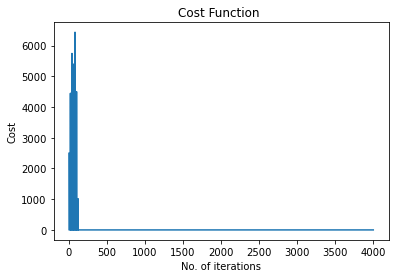

In [39]:
plt.title('Cost Function ')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(np.arange(Iterations), Mini_batch_Model[4])

## <span style='color:Orange'> Stochastic Gradient Descent </span>

In [40]:
Iterations = 700
ETA = 0.001

SGD_Model = SGDRegressor(max_iter = Iterations, tol=1e-3, eta0= ETA)
SGD_Model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(eta0=0.001, max_iter=700)

In [41]:
Features = Bag_data[['Weight','Height','Width']]
list_features = list(zip(Features, SGD_Model.coef_))

# Print Model Parameters
print("Coefficients are:", list_features )
print("Intercept is:", SGD_Model.intercept_)

# Predict
y_pred_sgd = SGD_Model.predict(X_test)

# R-Square
Sgd_r2_score = SGD_Model.score(X_test, y_test)
print('R2 score:', Sgd_r2_score)

# MSE
Sgd_mse = mean_squared_error(y_test, y_pred_sgd)
print('MSE: Mean Square Error : ', Sgd_mse)

# RMSE
Sgd_rmse = math.sqrt(Sgd_mse)
print('RMSE: Root mean Square Error: ', Sgd_rmse)

Coefficients are: [('Weight', -36.446622076305516), ('Height', 13.932610374429057), ('Width', 10.935008859841503)]
Intercept is: [-36.44798227]
R2 score: 0.7475932586914398
MSE: Mean Square Error :  35598.26488924054
RMSE: Root mean Square Error:  188.67502455078824


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y')

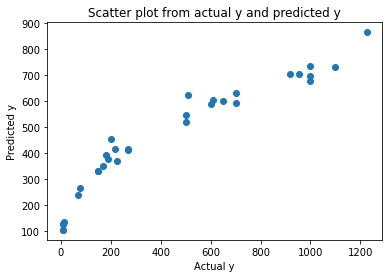

In [42]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred_sgd)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')

# <center><span style='color:Purple'> Observation / Conclusion </span>

1. Data has outliers in Cost , Weight , Weight1, Length, Width columns - checked using box plot.
2. Due to outlier data is not normally distributed - verified using Histograms.
3. Data has null values. Mean is the closest replacement.
4. Outlier treatment needed to normalize data. 
5. After observing correlation we can conclude that feature Weight, weight1, Length have high correlation. Hence dropped Weight1, Length.
6. Gradient Descent approach diverge and converged at different iterations and learning rate to attain global minima
7. Mini batch gradient descent achived global minima in less iterations comapre to Gradient descent.
8. Stochastic gradient descent approach did not result good accuracy. 
9. OLS approach provided more accurate results compared to other models. 

## Overall Model Performances
### OLS Method
Model Equation: Y =  -503.85639916498883 + ( 16.405337994927052 X1) + ( 11.574970017536486 X2) +(78.75187331683105 X3)<br>
R2 (Train): 0.905     <br>
R2 (Test) : 0.875     <br>
MSE       : 17541.663 <br>
RMSE      : 132.444   <br>

### Gradient Descent
Model Equation: Y =  -331.33814238164564 + ( 13.888819033194421 X1) + ( 10.097856043951522 X2) +(61.89985913971458 X3)<br>
R2 (Train):  0.874<br>
R2 (Test):  0.859<br>
MSE:  19835.070<br>
RMSE:  140.837<br>

### Mini Batch GD
Model Equation: Y =  -291.3718595103822 + ( 13.384848719205387 X1) + ( 10.108181645834765 X2) + (56.63210776174802 X3)<br>
R2 (Train):  0.858<br>
R2 (Test):  0.846<br>
MSE:  21584.359<br>
RMSE:  146.916<br>

### SGD
Model Equation: Y = -17.63873741 + ( -17.638432436275547 X1) + ( 14.110268055840551 X2) +(11.53697961386652 X3)<br>
R2 score: 0.725<br>
MSE: 38724.222<br>
RMSE: 211.956<br>

### <span style='color:Green'> Conclusion - For the given dataset, OLS Model suits best for predicting Bag Cost. </span>
